### Model assessment
Here we compared the weights learned by several model iterations, to highlight
- Performance user parameter combinations
- Interpretation based on TF regulators
- Coherence or learned graph-weights when assisting RNA-weights, or only using ATAC-weights

In [141]:
print('here...')

here...


In [142]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
!nvidia-smi

101043.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Tue Jul  9 01:46:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080        Off | 00000000:01:00.0 Off |                  N/A |
| 31%   38C    P2              61W / 320W |   7421MiB / 16376MiB |     43%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [145]:
cd ~/workspace/theislab/mubind/docs/notebooks/single_cell

/home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell


In [144]:
!ls -ltrh /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome*

101048.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


-rwxrwxr-x 1 ilibarra ilibarra 1.8M Jun 10 10:55 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_0.pth
-rwxrwxr-x 1 ilibarra ilibarra 1.8M Jun 10 10:55 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_1.pth
-rw-rw-r-- 1 ilibarra ilibarra 2.7M Jun 11 00:19 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_0_obs912.pth
-rw-rw-r-- 1 ilibarra ilibarra 2.8M Jun 11 00:19 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_1_obs912.pth
-rw-rw-r-- 1 ilibarra ilibarra 9.8M Jun 11 20:19 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_0_obs4148.pth
-rw-rw-r-- 1 ilibarra ilibarra  11M Jun 11 20:19 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/pancreas_multiome_use_logdynamic_1_obs4148.pth
-rw-rw-r-- 1 ilibarra ilibarra 1.6

In [146]:
# pip install matplotlib==3.7.2

In [147]:
import torch
import mubind as mb
import scanpy as sc

In [148]:
# load models
model_by_logdynamic = {}
for use_logdynamic in [False, True]:
    # the prepring case (4148)
    # hadamard 8161
    p = "pancreas_multiome_use_logdynamic_%i_obs8161.pth" % use_logdynamic
    print(p)
    model_by_logdynamic[use_logdynamic] = torch.load(p)

pancreas_multiome_use_logdynamic_0_obs8161.pth


pancreas_multiome_use_logdynamic_1_obs8161.pth


In [149]:
!ls -ltrh /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/atac_train*

101054.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


-rw-rw-r-- 1 ilibarra ilibarra 209M Jul  9 01:22 /home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell/atac_train.h5ad


In [150]:
ad = sc.read_h5ad("atac_train.h5ad")
rna_sample = sc.read_h5ad("rna_sample_train.h5ad")

In [151]:
import pickle


train = pickle.load(open("train_dataloader.pkl", "rb"))

In [152]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [153]:
!readlink -f .

101060.99s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell


In [154]:
# load the pancreas multiome dataset
rna, atac = mb.datasets.pancreas_multiome(data_directory="../../../../../../annotations/single_cell")

True data/scatac/pancreas_multiome/pancreas_multiome_2022_processed_rna_velocities_2024.h5ad


True data/scatac/pancreas_multiome/pancreas_multiome_2022_processed_atac.h5ad


In [155]:
# %lprun -f model.forward model.optimize_iterative(train, n_epochs=10, skip_kernels=list([0]) + list(range(2, 500)), opt_kernel_shift=[0, 0] + [0] * (n_kernels), opt_kernel_length=[0, 0] + [0] * (n_kernels))

In [156]:
# %lprun -f model.binding_modes.forward model.optimize_iterative(train, n_epochs=10, skip_kernels=list([0]) + list(range(2, 500)), opt_kernel_shift=[0, 0] + [0] * (n_kernels), opt_kernel_length=[0, 0] + [0] * (n_kernels))

In [157]:
import matplotlib.pyplot as plt

In [158]:
cell_type_key = "celltype"

Graph Layer |  False
True
3
order None
0 out of 288...
torch.Size([1, 4, 2])
          0         1
A  0.026523  0.046556
C  0.033638  0.045334
G  0.026398  0.039501
T  0.035827  0.015040
torch.Size([1, 4, 9])
          0         1         2         3         4         5         6    7         8
A  0.263145  0.070652  0.141055  0.016540  0.000000  0.022350  0.000000  0.0  0.279810
C  0.118597  0.077104  0.285031  0.008555  0.976616  0.005133  0.022350  0.0  0.434373
G  0.366413  0.225146  0.134495  0.947421  0.009696  0.970235  0.004563  1.0  0.104962
T  0.251844  0.627098  0.439419  0.027484  0.013688  0.002281  0.973087  0.0  0.180854
torch.Size([1, 4, 18])
         0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17
A  0.397727  0.181818  0.136364  0.045455  0.000000  0.318182  0.386364  0.363636  0.340909  0.522727  0.386364  0.227273  0.000000  0.000000  0.227273

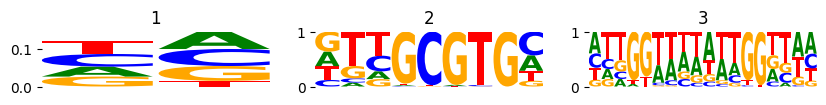

Graph Layer |  True
True
3
order None
0 out of 288...
torch.Size([1, 4, 2])
          0         1
A  0.015567  0.021564
C  0.043143  0.016891
G  0.042359  0.023657
T  0.026321  0.013008
torch.Size([1, 4, 9])
          0         1         2         3         4         5         6    7         8
A  0.263145  0.070652  0.141055  0.016540  0.000000  0.022350  0.000000  0.0  0.279810
C  0.118597  0.077104  0.285031  0.008555  0.976616  0.005133  0.022350  0.0  0.434373
G  0.366413  0.225146  0.134495  0.947421  0.009696  0.970235  0.004563  1.0  0.104962
T  0.251844  0.627098  0.439419  0.027484  0.013688  0.002281  0.973087  0.0  0.180854
torch.Size([1, 4, 18])
         0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17
A  0.397727  0.181818  0.136364  0.045455  0.000000  0.318182  0.386364  0.363636  0.340909  0.522727  0.386364  0.227273  0.000000  0.000000  0.227273 

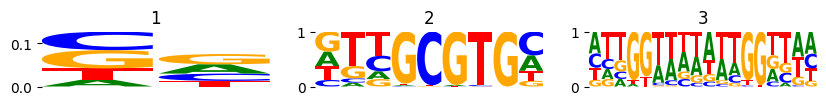

In [159]:
for optimize_log_dynamic in model_by_logdynamic:
    print("Graph Layer | ", optimize_log_dynamic)
    model = model_by_logdynamic[optimize_log_dynamic]
    # print(optimize_log_dynamic)
    from matplotlib import rcParams

    rcParams["figure.figsize"] = 10, 5
    rcParams["figure.dpi"] = 100
    mb.pl.logo(model, n_cols=3, show=True, n_rows=6, stop_at=4)  #  log=True)
    plt.show()

True


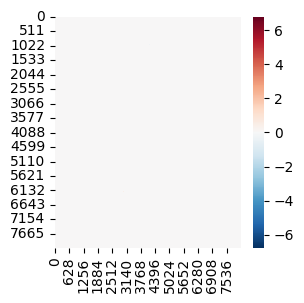

In [160]:
for optimize_log_dynamic in model_by_logdynamic:
    if not optimize_log_dynamic:
        continue
    model = model_by_logdynamic[optimize_log_dynamic]
    print(optimize_log_dynamic)

    tsum = torch.sum
    texp = torch.exp
    tspa = torch.sparse_coo_tensor
    tsmm = torch.sparse.mm
    t = torch.transpose

    # connectivities
    C = model.graph_module.conn_sparse
    a_ind = C.indices()

    log_dynamic = model.graph_module.log_dynamic
    D = model.graph_module.log_dynamic
    D_tril = tspa(a_ind, D, C.shape)  # .requires_grad_(True).cuda()
    D_triu = tspa(a_ind, -D, C.shape)  # .requires_grad_(True).cuda()
    D = D_tril + t(D_triu, 0, 1)
    # log_dynamic = log_dynamic + -torch.transpose(log_dynamic, 0, 1)
    # triu_indices = torch.triu_indices(row=n_rounds, col=n_rounds, offset=1)
    D

    import seaborn as sns

    mb.pl.set_rcParams({"figure.figsize": [3, 3]})
    sns.heatmap(D.to_dense().detach().cpu(), cmap="RdBu_r")
    plt.show()

In [161]:
model = model_by_logdynamic[1]

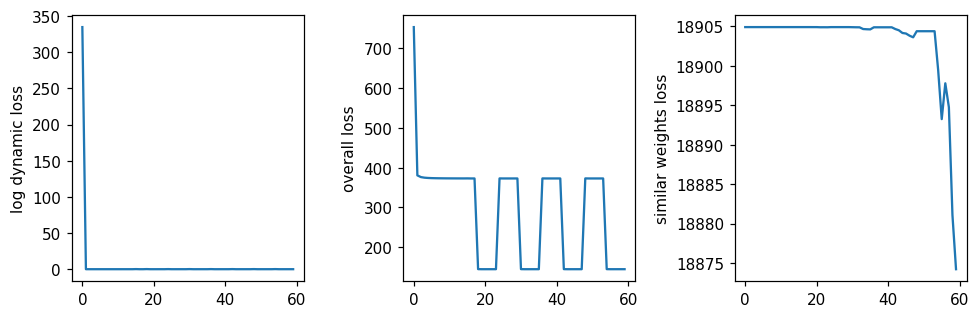

In [162]:
mb.pl.set_rcParams({"figure.figsize": [12, 3], "figure.dpi": 110})
plt.subplot(1, 4, 1)
plt.plot(model.loss_history_log_dynamic)
plt.ylabel("log dynamic loss")
plt.subplot(1, 4, 2)
plt.plot(model.loss_history)
plt.ylabel("overall loss")
plt.subplot(1, 4, 3)
plt.plot(model.loss_history_sym_weights)
plt.ylabel("similar weights loss")
plt.tight_layout()
plt.show()

In [163]:
import pandas as pd
import numpy as np

False
True


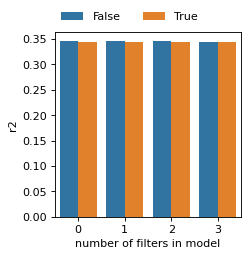

In [164]:
rcParams["figure.figsize"] = 3, 5
r2_all = []
for optimize_log_dynamic in model_by_logdynamic:
    print(optimize_log_dynamic)
    model = model_by_logdynamic[optimize_log_dynamic]
    # contributions per newly added kernel
    import seaborn as sns

    if len(model.best_r2_by_new_filter) != 0:
        r2 = pd.DataFrame(model.best_r2_by_new_filter, columns=["r2"]).reset_index()
        r2["opt_log_dynamic"] = optimize_log_dynamic
        r2_all.append(r2)

if len(r2_all) > 0:
    r2_all = pd.concat(r2_all)
    rcParams["figure.figsize"] = 3, 3
    rcParams["figure.dpi"] = 80
    ax = sns.barplot(
        data=r2_all,
        x="index",
        y="r2",
        hue="opt_log_dynamic",
    )
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.4, 1), ncol=3, title=None, frameon=False)

    plt.xlabel("number of filters in model")
    plt.show()

In [165]:
model = model_by_logdynamic[True]

torch.set_printoptions(precision=2)
dynamic_score = D.to_dense().detach().cpu().sum(axis=0)
# dyn_score
dynamic_score = dynamic_score
dynamic_score = (dynamic_score - dynamic_score.min()) / (dynamic_score.max() - dynamic_score.min())
ad.obs["dynamic_score"] = dynamic_score

ad.obs["dynamic_score_cluster"] = np.where(dynamic_score > dynamic_score.mean(), "dynamic", "static")
z0 = np.where(((dynamic_score - dynamic_score.mean()) / dynamic_score.std()) > 0.75, "dynamic", "static")
z1 = np.where(((dynamic_score - dynamic_score.mean()) / dynamic_score.std()) > 1, "dynamic", "static")
z2 = np.where(((dynamic_score - dynamic_score.mean()) / dynamic_score.std()) > 2, "dynamic", "static")

ad.obs["dynamic_score_z0"] = z0
ad.obs["dynamic_score_z1"] = z1
ad.obs["dynamic_score_z2"] = z2

In [166]:
ad.obs[[c for c in ad.obs if 'dynamic' in c]].describe()

dynamic_score
count    8161.000000
mean        0.308962
std         0.040538
min         0.000000
25%         0.308942
50%         0.308962
75%         0.308974
max         1.000000

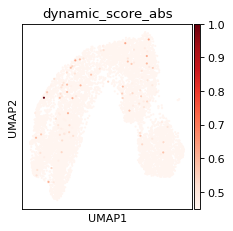

In [167]:
ad.obs["dynamic_score_abs"] = ad.obs["dynamic_score"].abs()
sc.pl.umap(ad, color="dynamic_score_abs", color_map="Reds", vmin=0.45)

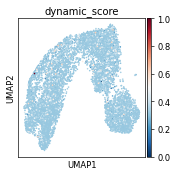

z0


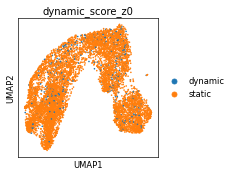

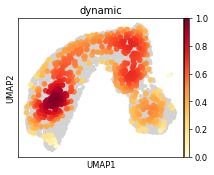

z1


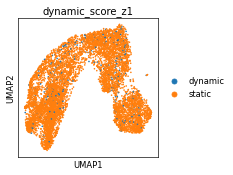

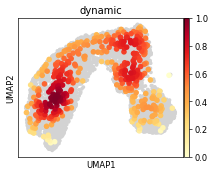

z2


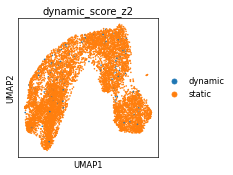

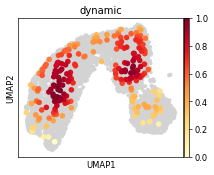

In [168]:
# contributions per newly added kernel
mb.pl.set_rcParams({"figure.figsize": [3, 3], "figure.dpi": 60})

sc.pl.umap(ad, color=["dynamic_score"], cmap="RdBu_r", sort_order=True)

for z in ['z0', 'z1', 'z2']:
    print(z)
    sc.pl.umap(ad, color=["dynamic_score_%s" % z], cmap="RdBu_r", sort_order=True)
    sc.tl.embedding_density(ad, basis="umap", groupby="dynamic_score_%s" % z)
    sc.pl.embedding_density(
        ad, basis="umap", key="umap_density_dynamic_score_%s" % z, group="dynamic"
    )  # basis='umap', groupby='dynamic_score_cluster')


<Axes: >

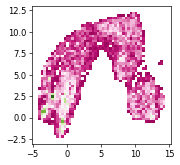

In [169]:
import seaborn as sns

umap = ad.obsm["X_umap"]
sns.histplot(x=umap[:, 0], y=umap[:, 1], bins=50, cmap="PiYG")

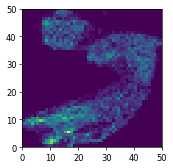

In [170]:
plt.pcolormesh(np.histogram2d(umap[:, 0], umap[:, 1], bins=50)[0])

In [171]:
x, y = np.meshgrid(umap[:, 0], umap[:, 1])

In [172]:
x = umap[:, 1]  # array_txt[:,0]
y = umap[:, 1]  # array_txt[:,1]
z = ad.obs["dynamic_score"].values  # array_txt[:,2]

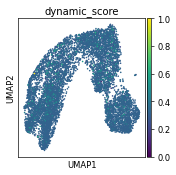

In [173]:
sc.pl.umap(ad, color="dynamic_score")

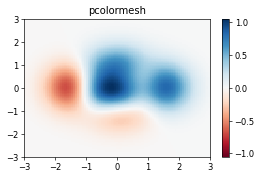

In [174]:
import matplotlib.pyplot as plt
import numpy as np

rcParams["figure.figsize"] = 5, 3

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
z = (1 - x / 2.0 + x**5 + y**3) * np.exp(-(x**2) - y**2)
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap="RdBu", vmin=z_min, vmax=z_max)
ax.set_title("pcolormesh")
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [175]:
import itertools
import numpy as np


def grid(x, y, z, size_x=1, size_y=1):

    def pairwise(iterable):
        "s -> (s0,s1), (s1,s2), (s2, s3), ..."
        a, b = itertools.tee(iterable)
        next(b, None)
        return zip(a, b)

    minx, maxx = int(min(x)), int(max(x)) + 1
    miny, maxy = int(min(y)), int(max(y)) + 1

    result = []
    x_edges = pairwise(np.arange(minx, maxx + 1, size_x))
    for xleft, xright in x_edges:
        xmask = np.logical_and(x >= xleft, x < xright)
        y_edges = pairwise(np.arange(miny, maxy + 1, size_y))
        for yleft, yright in y_edges:
            ymask = np.logical_and(y >= yleft, y < yright)
            cell = z[np.logical_and(xmask, ymask)]
            result.append(cell.sum())

    result = np.array(result).reshape((maxx - minx, maxy - miny))
    return np.flip(result.T, 0)

In [176]:
grid_dyn_score = grid(umap[:, 0], umap[:, 1], ad.obs["dynamic_score"], size_x=1, size_y=1)
grid_counts = grid(umap[:, 0], umap[:, 1], ad.obs["celltype"].cat.codes.values, size_x=1, size_y=1)

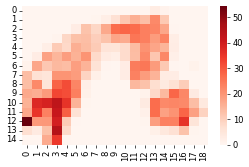

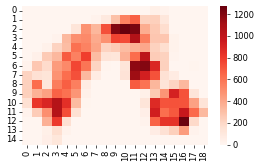

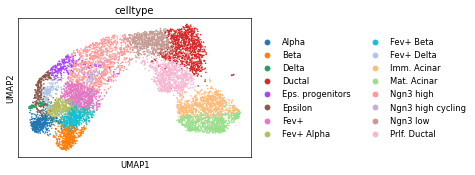

In [177]:
sns.heatmap(grid_dyn_score, cmap="Reds")
plt.show()
sns.heatmap(grid_counts, cmap="Reds")
plt.show()

sc.pl.umap(ad, color="celltype")

In [179]:
# for optimize_log_dynamic in model_by_logdynamic:
#     mb.pl.set_rcParams({'figure.figsize': [3, 3], 'figure.dpi': 90})
#     print(optimize_log_dynamic)
#     model = model_by_logdynamic[optimize_log_dynamic]
#     mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t1', xlab='p1', k=8)
#     plt.show()

#     mb.pl.set_rcParams({'figure.figsize': [10, 7], 'figure.dpi': 90})
#     mb.pl.logo(model,
#                title=False,
#                xticks=False,
#                rowspan_dinuc=0,
#                rowspan_mono=1,
#                n_rows=12,
#                n_cols=3,
#                stop_at=20) # n_cols=len(reduced_groups))
#     plt.show()

In [178]:
model = model_by_logdynamic[True]

In [180]:
G = model.graph_module.conn_sparse.detach().cpu().to_dense()  # (C, C)

In [181]:
# number of non_zero weights
len(G[G != 0])

111684

In [182]:
# output = model(**inputs, use_conn=False, return_binding_scores=True)

In [183]:
print("here...")

here...


In [184]:
ad

AnnData object with n_obs × n_vars = 8161 × 50000
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'dynamic_score', 'dynamic_score_cluster', 'dynamic_score_z0', 'dynamic_score_z1', 'dynamic_score_z2', 'dynamic_score_abs', 'umap_density_dynamic_score_z0', 'umap_density_dynamic_score_z1', 'umap_density_dynamic_score_z2'
    var: 'modality', 'acc_score', 'acc_score_rank', 'chr', 'start', 'end', 'summit', 'summit.start', 'summit.end', 'k.summit'
    uns: 'celltype_colors', 'neighbors', 'dynamic_score_z0_colors', 'umap_density_dynamic_score_z0_params', 'dynamic_score_z1_colors', 'umap_density_dynamic_score_z1_params', 'dynamic_score_z2_colors', 'umap_density_dynamic_score_z2_params'
    obsm: 'X_pca', 'X_pca_wsnn',

In [185]:
model = model.cuda()

In [186]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device

In [187]:
for optimize_log_dynamic in model_by_logdynamic:
    print(optimize_log_dynamic)
    if not optimize_log_dynamic:
        continue
    model = model_by_logdynamic[optimize_log_dynamic].cuda()

    umap = ad.obsm["X_umap"].copy()
    umap = np.sort(umap, 0)

    x = umap[:, 0]
    y = umap[:, 1]
    X, Y = np.meshgrid(x, y)

    n_points = x.shape[0]
    # x-component to the right
    u = np.ones((n_points, n_points))
    # y-component zero
    v = np.zeros((n_points, n_points))

    pred = []
    binding_per_mode = []
    for i, batch in enumerate(train):
        # Get a batch and potentially send it to GPU memory.
        mononuc = batch["mononuc"].to(device)
        # print(i, mononuc.shape)
        b = batch["batch"].to(device) if "batch" in batch else None
        rounds = batch["rounds"].to(device) if "rounds" in batch else None
        countsum = batch["countsum"].to(device) if "countsum" in batch else None
        seq = batch["seq"] if "seq" in batch else None
        residues = batch["residues"].to(device) if "residues" in batch else None
        if residues is not None and train.dataset.store_rev:
            mononuc_rev = batch["mononuc_rev"].to(device)
            inputs = {"mono": mononuc, "mono_rev": mononuc_rev, "batch": b, "countsum": countsum, "residues": residues}
        elif residues is not None:
            inputs = {"mono": mononuc, "batch": b, "countsum": countsum, "residues": residues}
        elif train.dataset.store_rev:
            mononuc_rev = batch["mononuc_rev"].to(device)
            inputs = {"mono": mononuc, "mono_rev": mononuc_rev, "batch": b, "countsum": countsum}
        else:
            inputs = {"mono": mononuc, "batch": b, "countsum": countsum}

        inputs["scale_countsum"] = model.datatype == "selex"
        output = model(**inputs, use_conn=False, return_binding_scores=True)
        output = output.cpu().detach().numpy()
        # print("here...")
        # print(output.shape)
        # print(output.sum())
        pred.append(output)


        output = model(**inputs, use_conn=False, return_binding_per_mode=True)
        output = output.cpu().detach().numpy()
        print("here...")
        # print(output.shape)
        # print(output.sum())
        binding_per_mode.append(output)

    # pred = np.concatenate(pred).T

    binding_scores = np.concatenate(pred).T
    binding_per_mode = np.concatenate(binding_per_mode)

    # ad.layers['velocity'] = pred

    # conn = model.graph_module.conn_sparse.detach().cpu()
    # conn = model.graph_module.conn_sparse.detach().cpu().to_dense()
    # v = conn.sum(axis=1)
    # ad.layers['velocity'] = torch.stack([v,] * ad.shape[1], axis=1).numpy()

    # ad.layers['counts'] = ad.X

    # mb.pl.set_rcParams({'figure.figsize': [5, 4], 'figure.dpi': 90})
    # plt.hist(model.graph_module.conn_sparse.values().detach().cpu().numpy())
    # plt.show()

    # import scvelo as scv

    # sc.pp.neighbors(ad)

    # # scv.tl.velocity_graph(ad, vkey='velocity', xkey='counts')
    # # ad.layers['velocity'] = ad.obs['dynamic_score']

    # scv.tl.velocity_graph(ad, vkey='velocity', xkey='counts')
    # ax = scv.pl.velocity_embedding_stream(ad, color='celltype', show=False) #  X_grid='X_umap', V=V)


X = ad.X.A
G @ binding_scores
np.random.shuffle(binding_scores)

False
True


here...
(128, 8161)
2333563700000.0
here...
(128, 288)
385971500.0
here...
(128, 8161)
2164186200000.0
here...
(128, 288)
305232200.0
here...
(128, 8161)
1960225300000.0
here...
(128, 288)
385218800.0
here...
(128, 8161)
1904299700000.0
here...
(128, 288)
415845820.0
here...
(128, 8161)
1817925900000.0
here...
(128, 288)
531354430.0
here...
(128, 8161)
3351682000000.0
here...
(128, 288)
323589100.0
here...
(128, 8161)
2021405100000.0
here...
(128, 288)
239400640.0
here...
(128, 8161)
2861281600000.0
here...
(128, 288)
385560200.0
here...
(128, 8161)
2667462800000.0
here...
(128, 288)
230950940.0
here...
(128, 8161)
1687510500000.0
here...
(128, 288)
427797950.0
here...
(128, 8161)
1649266700000.0
here...
(128, 288)
295665800.0
here...
(128, 8161)
2192399700000.0
here...
(128, 288)
313602780.0
here...
(128, 8161)
2498291800000.0
here...
(128, 288)
348945800.0
here...
(128, 8161)
2512679900000.0
here...
(128, 288)
361561540.0
here...
(128, 8161)
2696382000000.0
here...
(128, 288)
2553475

In [188]:
ad.shape, binding_per_mode.shape

((8161, 50000), (50000, 288))

In [189]:
import scvelo as scv

In [190]:
ad
ad.layers["velocity"] = binding_scores
# scv.tl.velocity_graph(ad, vkey='velocity', xkey='counts')
# ax = scv.pl.velocity_embedding_stream(ad, color='celltype', show=False) #  X_grid='X_umap', V=V)

In [191]:
np.random.shuffle(binding_scores)
binding_scores

array([[2500940.5, 1890914. , 1889723.5, ..., 3263812.2, 3103024.2,
        3448359.2],
       [2501599.2, 1891362.6, 1890184.9, ..., 3264912.2, 3104238.8,
        3449749.2],
       [2501137.8, 1891091.6, 1889934.2, ..., 3264679.2, 3104097.8,
        3449667. ],
       ...,
       [2503901.5, 1892741.1, 1891470.9, ..., 3268160.8, 3107687. ,
        3453787.2],
       [2502435.8, 1891914.1, 1890727.1, ..., 3264986.8, 3104027.2,
        3449359. ],
       [2503276.8, 1892594.8, 1891403.4, ..., 3271092.5, 3111075.8,
        3458125. ]], dtype=float32)

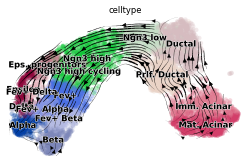

In [192]:
try:
    scv.pl.velocity_embedding_stream(rna_sample, color="celltype")
except Exception:
    print("sample too small.")

In [193]:
# np.random.shuffle(binding_scores)
# ad.layers['velocity'] = binding_scores
# scv.tl.velocity_graph(ad, vkey='velocity', xkey='counts')
# ax = scv.pl.velocity_embedding_stream(ad, color='celltype', show=False) #  X_grid='X_umap', V=V)

<Axes: >

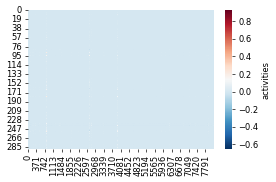

In [194]:
import seaborn as sns


act = model.get_log_activities().detach().cpu().squeeze(0)

sns.heatmap(act, cmap="RdBu_r", cbar_kws={"label": "activities"})

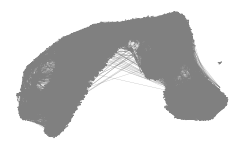

In [195]:
scv.pl.velocity_graph(rna)

In [196]:
# ax = scv.pl.velocity_embedding_stream(ad,
#                                       color='celltype',
#                                       # density=2,
#                                       arrow_color='black',
#                                       n_neighbors=15) # show=False) #  X_grid='X_umap', V=V)

In [197]:
# ax = scv.pl.velocity_embedding_stream(ad, color='celltype', density=2, arrow_color='black', n_neighbors=15) # show=False) #  X_grid='X_umap', V=V)

In [198]:
# scv.pl.velocity_embedding_stream(ad, color='celltype', n_neighbors=15) #  X_grid='X_umap', V=V)

## Study the asssociations betweeen obtained weights and cluster-specific transcription factors

Load information from archetypes DB (Vierstra et al 2020)

In [199]:
rna_sample, ad.shape

(AnnData object with n_obs × n_vars = 8161 × 14663
     obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'batch', 'velocity_self_transition'
     var: 'modality', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
     uns: 'celltype_colors', 'neighbors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
     obsm: 'X_pca', 'X_pca_wsnn', 'X_spca_wsnn', 'X_umap', 'X_umap_ATAC', 'X_umap_GEX', 'X_umap_wsnn', 'lsi_full', 'lsi_red', 'umap', 'umap_ATAC', 'umap_GEX', 'velocity_umap'
     layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced',

In [200]:
rna_sel = rna_sample  # rna[rna.obs_names.isin(ad.obs_names),:].copy()
rna_sel.shape

(8161, 14663)

In [201]:
pwd

'/home/ilibarra/workspace/theislab/mubind/docs/notebooks/single_cell'

In [202]:
import bindome as bd


bd.constants.ANNOTATIONS_DIRECTORY = "annotations"



anno = mb.datasets.archetypes_anno()

In [203]:
rna_sel.shape
anno.sort_values("Cluster_ID")

Cluster_ID          Name          DBD             Seed_motif  Total_width  Consensus_left  Consensus_right  Cluster_size
61            1          HD/1  homeodomain     LHX6_homeodomain_3           12               0               12             2
72            2          HD/2  homeodomain          ALX3_MA0634.1           26               8               16           186
79            3          HD/3  homeodomain    VENTX_homeodomain_2           21               3               20             1
80            4          HD/4  homeodomain  BARX1_MOUSE.H11MO.0.C           17               5               13            17
81            5          HD/5  homeodomain    BARX1_homeodomain_1           21               2               18             6
..          ...           ...          ...                    ...          ...             ...              ...           ...
163         282         PAX/2          PAX   PAX5_HUMAN.H11MO.0.A           24               4               21             3
161         283  PAX-halfsite          PAX          Pax2_MA0067.1            8               1                7             1
0           284           AHR         bHLH    AHR_HUMAN.H11MO.0.B            9               2                8             3
105         285      KLF/SP/3         C2H2   KLF8_HUMAN.H11MO.0.C            9               0                9             2
285         286        ZSCAN4         C2H2          ZSCAN4_C2H2_1           15               1               14             2

[286 rows x 8 columns]

False


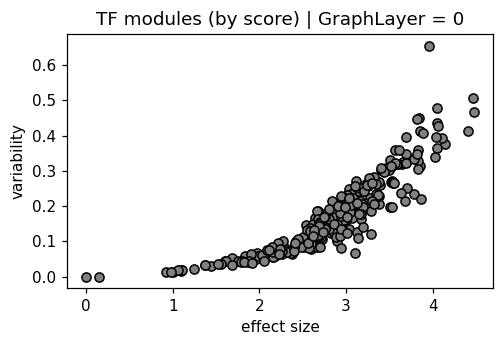

True


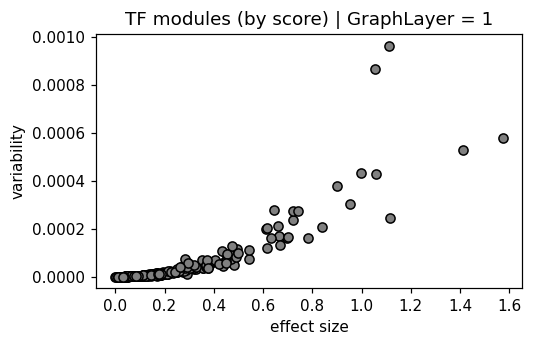

In [204]:
for optimize_log_dynamic in model_by_logdynamic:
    print(optimize_log_dynamic)
    model = model_by_logdynamic[optimize_log_dynamic]
    log_act = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)
    log_act = pd.DataFrame(log_act.detach().cpu().numpy())
    # log_act.columns = anno['Seed_motif'][2]
    # log_act.columns = ['intercept', 'dinuc_bias'] + list(anno['Seed_motif'].values)
    log_act.index = ad.obs_names
    ad.obsm["mubind_activities"] = log_act

    mb.pl.set_rcParams({"figure.figsize": [5, 3], "figure.dpi": 110})
    delta = log_act.max(axis=0) - log_act.min(axis=0)
    var = log_act.var(axis=0)
    plt.scatter(delta, var, color="gray", edgecolors="black")
    plt.xlabel("effect size")
    plt.ylabel("variability")
    plt.title("TF modules (by score) | GraphLayer = %i" % optimize_log_dynamic)
    plt.show()

In [205]:
# unique names for annotation
names = anno["Name"]  # .sort_values('Name')
added = dict()
new_name = []
for name in names:
    if not name in added:
        new_name.append(name)
        added[name] = 0
    else:
        new_name.append(name + "_%i" % added[name])
        added[name] += 1
anno["Name_unique"] = new_name

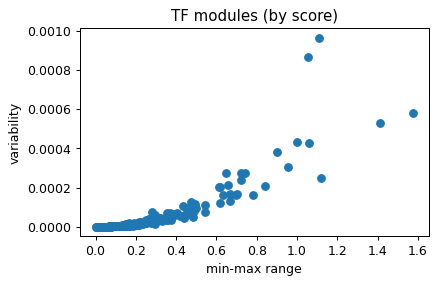

In [206]:
from scipy.stats import spearmanr


res = []

for optimize_log_dynamic in model_by_logdynamic:

    if not optimize_log_dynamic:
        continue


    model = model_by_logdynamic[optimize_log_dynamic]

    log_act = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)

    log_act = pd.DataFrame(log_act.detach().cpu().numpy())

    # log_act.columns = anno['Seed_motif'][2]

    log_act.columns = ["intercept", "dinuc_bias"] + list(range(1, 287))

    log_act.index = ad.obs_names

    ad.obsm["mubind_activities"] = log_act


    mb.pl.set_rcParams({"figure.figsize": [5, 3], "figure.dpi": 90})

    delta = log_act.max(axis=0) - log_act.min(axis=0)

    var = log_act.var(axis=0)

    plt.scatter(delta, var)

    plt.xlabel("min-max range")

    plt.ylabel("variability")

    plt.title("TF modules (by score)")

    plt.show()


    for c in log_act:

        a = log_act[c]

        b = ad.obs["dynamic_score"].values

        # print(a.shape, b.shape)

        res.append([optimize_log_dynamic, c] + list(spearmanr(a, b)))


res = pd.DataFrame(res, columns=["opt_log_dynamic", "archetype_id", "spearman", "p_val"])

In [207]:
# add archetypes name
meta = pd.DataFrame(pd.concat([delta, var], axis=1))
meta.columns = ["max_effect", "variability"]
meta["name"] = ["intercept", "dinuc_bias"] + list(range(1, 287))
clu = mb.datasets.archetypes_clu()
meta["archetypes_name"] = meta["name"].map(anno.set_index("Cluster_ID")["Name_unique"])
meta["archetypes_name"] = np.where(pd.isnull(meta["archetypes_name"]), meta["name"], meta["archetypes_name"])

meta["archetypes_seed"] = meta["name"].map(anno.set_index("Cluster_ID")["Seed_motif"])
meta = meta.sort_values("max_effect", ascending=0)
meta

res = res.merge(meta, left_on="archetype_id", right_on="name")
res = res.sort_values("p_val", ascending=True)

In [208]:
name_by_filter_id = meta["archetypes_name"].to_dict()
# name_by_filter_id

## Observe general scores per case

<Axes: xlabel='max_effect', ylabel='archetypes_name'>

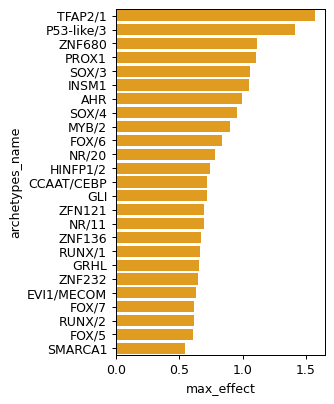

In [209]:
rcParams["figure.figsize"] = 3, 5
sns.barplot(
    data=res.sort_values("max_effect", ascending=False).head(25), x="max_effect", y="archetypes_name", color="orange"
)

In [210]:
res

opt_log_dynamic archetype_id  spearman         p_val  max_effect   variability       name archetypes_name          archetypes_seed
0               True    intercept -0.128655  1.830220e-31    0.000008  6.168964e-14  intercept       intercept                      NaN
142             True          141 -0.127593  5.705907e-31    0.275390  1.983516e-05        141          ZNF667    ZN667_HUMAN.H11MO.0.C
102             True          101 -0.122309  1.416205e-28    0.106169  3.267231e-06        101          NFAC/2    NFAC1_HUMAN.H11MO.0.B
254             True          253 -0.121638  2.803525e-28    0.037421  2.330403e-07        253           MYB/1           MYBL1_MA0776.1
236             True          235 -0.120579  8.185001e-28    0.646299  2.766286e-04        235          ZNF232            ZNF232_C2H2_1
..               ...          ...       ...           ...         ...           ...        ...             ...                      ...
44              True           43 -0.038936  4.344710e-04    0.192272  1.223356e-05         43           NR/14  NR2E1_nuclearreceptor_1
48              True           47 -0.033646  2.366103e-03    0.541450  7.312555e-05         47           NR/18      NR1A4+RXRA_MA1146.1
93              True           92 -0.030275  6.235055e-03    1.058410  4.285645e-04         92           SOX/3              SOX10_HMG_4
18              True           17 -0.029660  7.371100e-03    0.476006  6.549768e-05         17           CUX/4     CUX2_MOUSE.H11MO.0.C
94              True           93 -0.024814  2.498141e-02    0.953630  3.050420e-04         93           SOX/4              SOX10_HMG_1

[288 rows x 9 columns]

In [211]:
pd.options.display.width = 1000

True
1
order None
0 out of 288...
torch.Size([1, 4, 2])
torch.Size([1, 4, 9])
torch.Size([1, 4, 18])
torch.Size([1, 4, 9])
torch.Size([1, 4, 13])
torch.Size([1, 4, 14])
torch.Size([1, 4, 13])
torch.Size([1, 4, 17])
torch.Size([1, 4, 17])
10 out of 288...
torch.Size([1, 4, 13])
torch.Size([1, 4, 12])
torch.Size([1, 4, 15])
torch.Size([1, 4, 8])
torch.Size([1, 4, 11])
torch.Size([1, 4, 14])
torch.Size([1, 4, 12])
torch.Size([1, 4, 12])
torch.Size([1, 4, 17])
torch.Size([1, 4, 10])
break


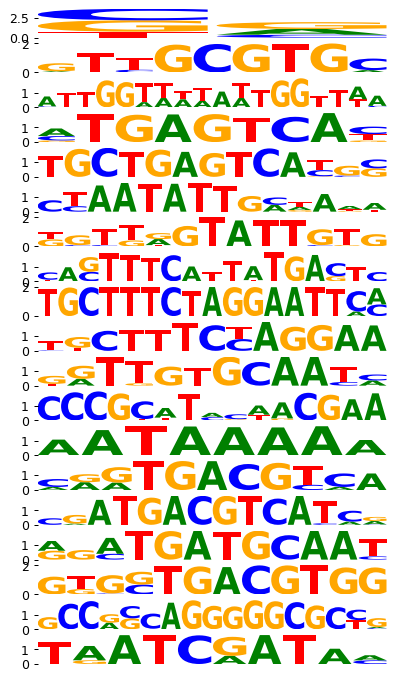

In [223]:
# visualize the logos as obtained by the model in each step
mb.pl.set_rcParams({"figure.figsize": [5, 20], "figure.dpi": 90})
# mb.pl.logo(model, title=False, xticks=False, rowspan_dinuc=0, rowspan_mono=1, n_rows=40, n_cols=1, stop_at=5, log_odds=False)
mb.pl.logo(model, title=False, xticks=False, rowspan_dinuc=0, rowspan_mono=1, n_rows=40, n_cols=1, stop_at=20, log_odds=True)
# n_rows=len(res.head(20).index),

True
1
order Index([  0, 142, 102, 254, 236, 222, 141, 282,  66,  91, 116, 135, 276,   1,
        31, 191,  60, 192, 259, 154],
      dtype='int64')
0 out of 288...


10 out of 288...


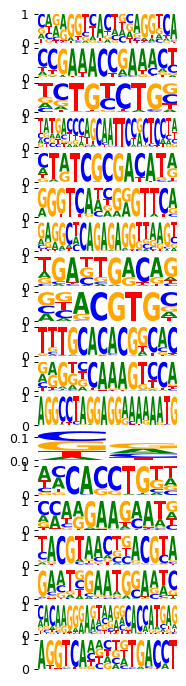

<Figure size 180x1800 with 0 Axes>

In [237]:
mb.pl.set_rcParams({"figure.figsize": [2, 20], "figure.dpi": 90})
mb.pl.logo(
    model,
    title=False,
    xticks=False,
    rowspan_dinuc=0,
    rowspan_mono=1,
    n_rows=40,
    # n_rows=len(res.head(20).index),
    n_cols=1,
    order=res.head(20).index,
)  # n_cols=len(reduced_groups))
plt.tight_layout()
plt.show()

In [238]:
import resource

print("total GB used:", resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1e6)

total GB used: 23.975296


In [239]:
# for k in ad.obsm['log_activities'].iloc[:,2:]:
#     ad.obs[str(k)] = ad.obsm['log_activities'][k]
# sc.pl.umap(ad, color=map(str, ad.obsm['log_activities'].iloc[:,2:]), cmap='Reds')

In [240]:
rna_sel.obsm["X_umap"] = ad.obsm["X_umap"]

In [241]:
def find_varname(ad, k, shuffle=False):
    if not shuffle:
        return ad.var_names[ad.var_names.str.upper().str.startswith(k.upper())]
    else:
        ad_sel = ad.var_names[ad.var_names.str.upper().str.startswith(k.upper())]
        return pd.Series(ad.var_names).sample(ad_sel.shape[0]).values

In [242]:
from scipy.stats import spearmanr, pearsonr

Calculate global correlations between the activities obtained per motif and gene-specific expression

In [244]:
all_targets = set()
for optimize_log_dynamic in model_by_logdynamic:
    print(optimize_log_dynamic)
    model = model_by_logdynamic[optimize_log_dynamic]

    log_act = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)
    log_act = pd.DataFrame(log_act.detach().cpu().numpy())
    log_act.index = ad.obs_names

    ad.obsm["log_activities"] = log_act
    ad.obsm["log_activities"].columns = ["intercept", "dinuc_bias"] + list(range(1, 287))

    # collect all targets
    for k in ad.obsm["log_activities"].iloc[:, 2:]:
        log_act = ad.obsm["log_activities"][k].values
        names = set()
        clu_sel = clu[clu["Cluster_ID"] == k]["Motif"]
        for g in clu_sel:
            names.add(g.split("_")[0].split(".")[0].split("+")[0].upper())
        for g in anno[anno["Cluster_ID"] == k]["Seed_motif"]:
            names.add(g.split("_")[0].split(".")[0])
        # print(k, names)
        targets = set()
        for name in names:
            target = find_varname(rna_sel, name)
            for t in target:
                all_targets.add(t)
        if len(targets) > 0 and False:
            sc.pl.umap(rna_sel, color=targets, cmap="Reds")

False
True


In [248]:

def get_act_gene_corr(model_by_logdynamic, shuffle=False, random_state=0):
    print('association between motif activities and related TF targets (shuffle = %i)' % shuffle)
    res = []
    # print(len(all_targets))

    rna_sel_df = rna_sel.to_df()

    for optimize_log_dynamic in model_by_logdynamic:
        print('use GraphLayer = %i' % optimize_log_dynamic)
        model = model_by_logdynamic[optimize_log_dynamic]

        log_act = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)
        log_act = pd.DataFrame(log_act.detach().cpu().numpy())
        log_act.index = ad.obs_names

        ad.obsm['log_activities'] = log_act
        ad.obsm['log_activities'].columns = ['intercept', 'dinuc_bias'] + list(range(1, 287))

        # if shuffle:
        #     random_cols = ad.obsm['log_activities'].iloc[:,2:].columns.values
        #     np.random.shuffle(random_cols)
        #     # random_cols
        
        for ki, k in enumerate(ad.obsm['log_activities'].iloc[:,2:]):
            next_log_act = ad.obsm['log_activities'][k].values

            # if shuffle:
            #     next_log_act = ad.obsm['log_activities'][random_cols[ki]].values
            
            # print(ki)
            # if ki % 30 == 0:
            #     print(ki)
            names = set()
            clu_sel = clu[clu['Cluster_ID'] == k]['Motif']
            for g in clu_sel:
                names.add(g.split('_')[0].split('.')[0].split('+')[0].upper())
            for g in anno[anno['Cluster_ID'] == k]['Seed_motif']:
                names.add(g.split('_')[0].split('.')[0])
            # print(k, names)
            next_targets = set()
            for name in names:
                target = find_varname(rna_sel, name, shuffle=shuffle)
                # print(name, target)
                for t in target:
                    next_targets.add(t)

            # for t in all_targets:
            for t in set(all_targets).intersection(next_targets):
                gex = rna_sel_df[[t]].to_numpy() # rna_sel_df[t].A
                assert gex.shape[1] == 1
                gex = gex.flatten()
                # print(next_log_act.shape, gex.shape)
                # print(t, pearsonr(next_log_act, gex))
                res.append([ki, optimize_log_dynamic, k, t, t in next_targets] +
                        list(spearmanr(next_log_act, gex)))
                
    res = pd.DataFrame(res, columns=['filter_id', 'opt_log_dynamic', 'archetype_id', 'gene_name', 'matched', 'spearman', 'p_val'])

    # p-values
    res['module_name'] = res['archetype_id'].map(anno.set_index('Cluster_ID')['Name'].to_dict())
    res['p_val'] = np.where(pd.isnull(res['p_val']), 1.0, res['p_val'])
    
    # p-val adjust
    from statsmodels.stats.multitest import fdrcorrection
    res['p_adj'] = fdrcorrection(res['p_val'])[1]
    return res


In [249]:
res = get_act_gene_corr(model_by_logdynamic)
print('\nRunning permutations...')
n_perm = 10
shuffled = []
for i in range(n_perm):
    print(i)
    shuffled.append(get_act_gene_corr(model_by_logdynamic, shuffle=1, random_state=i))
# shuffled = [get_act_gene_corr(model_by_logdynamic, shuffle=1, random_state=i) for i in range(50)]

association between motif activities and related TF targets (shuffle = 0)
use GraphLayer = 0
use GraphLayer = 1

Running permutations...
0
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
1
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
2
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
3
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
4
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
5
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
6
association between motif activities and related TF targets (shuffle = 1)
use GraphLayer = 0
use GraphLayer = 1
7
association between motif activities and related TF targets (sh

In [250]:
table = []
for use_graph in [False, True]:
    for thr in range(1, 10):
        sel = res[res['opt_log_dynamic'] == use_graph]
        next_thr = 10 ** (-thr)
        n_pos = sel[sel['p_adj'] < next_thr].shape[0]
        n_neg = [s[(s['p_adj'] < next_thr) & (s['opt_log_dynamic'] == use_graph)].shape[0] for s in shuffled]
        # print(next_thr, n_pos, np.mean(n_neg), np.std(n_neg), (n_pos - np.mean(n_neg)) / np.std(n_neg))
        table.append([next_thr, n_pos, np.mean(n_neg), np.std(n_neg), (n_pos - np.mean(n_neg)) / np.std(n_neg), use_graph])
table = pd.DataFrame(table, columns=['p_adj_thr', 'n_pos', 'mu', 'sigma', 'zscore', 'graph_layer'])
table.pivot(index='graph_layer', columns='p_adj_thr', values='zscore')

p_adj_thr    1.000000e-09  1.000000e-08  1.000000e-07  1.000000e-06  \
graph_layer                                                           
False           60.517926     58.066110     52.468997     45.467622   
True            10.809524     17.711662     20.142857     26.273979   

p_adj_thr    1.000000e-05  1.000000e-04  1.000000e-03  1.000000e-02  \
graph_layer                                                           
False           49.478586     59.632362     60.882076     85.712708   
True            29.147260     36.988993     49.399482     49.040783   

p_adj_thr    1.000000e-01  
graph_layer                
False           88.040062  
True            66.341437

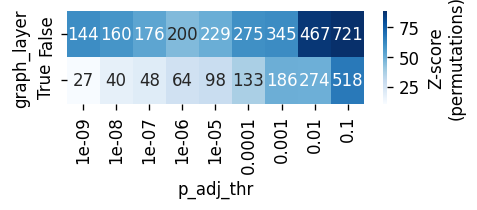

In [251]:
rcParams['figure.figsize'] = 4, 1
rcParams['figure.dpi'] = 120
rcParams['pdf.fonttype'] = 42
hm = table.pivot(index='graph_layer', columns='p_adj_thr', values='n_pos').fillna(0)
z = table.pivot(index='graph_layer', columns='p_adj_thr', values='zscore').fillna(0)
sns.heatmap(z, annot=hm, fmt='', cmap='Blues', # vmin=0, vmax=5,
            cbar_kws={'label': 'Z-score\n(permutations)'})

plt.savefig('../../../output/zscore_filter_act_gex_cor_pancreatic_endocrinogesis.pdf')
plt.show()

In [252]:
genes_by_module_name = (
    res.groupby(["module_name"])["gene_name"].apply(lambda grp: list(grp.value_counts().index)).to_dict()

)
# genes_by_module_name

In [253]:
res.sort_values("p_adj")

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman  \
280          68            False            69     Meis2     True  0.253829   
1712        245            False           246      Rfx6     True -0.246340   
1588        150            False           151      Rest     True  0.237454   
1377         81            False            82    Pou3f4     True  0.227013   
1432         95            False            96       Ehf     True  0.219672   
...         ...              ...           ...       ...      ...       ...   
3438        108             True           109      Egr1     True  0.000016   
2971         69             True            70   Thumpd1     True -0.000016   
2870         69             True            70   Tpd52l1     True  0.000008   
1177         69            False            70  Tnfrsf22     True  0.000005   
1406         91            False            92     Sox11     True -0.000002   

              p_val module_name          p_adj  
280   3.531138e-120        MIES  1.363019e-116  
1712  4.372267e-113       RFX/3  8.438475e-110  
1588  5.574720e-105   REST/NRSF  7.172807e-102  
1377   7.048015e-96       POU/2   6.801334e-93  
1432   9.477964e-90       ETS/2   7.316988e-87  
...             ...         ...            ...  
3438   9.988476e-01    KLF/SP/2   9.996254e-01  
2971   9.988485e-01       TBX/1   9.996254e-01  
2870   9.993975e-01       TBX/1   9.998707e-01  
1177   9.996116e-01       TBX/1   9.998707e-01  
1406   9.998756e-01       SOX/3   9.998756e-01  

[3860 rows x 9 columns]

In [254]:
res["k"] = res["gene_name"] + "_" + res["archetype_id"].astype(str)
df2 = res.pivot(index="k", columns="opt_log_dynamic", values="spearman")
# df2 = res # .pivot(index='k', columns='opt_log_dynamic', values='spearman')

In [255]:
df2

opt_log_dynamic     False     True 
k                                  
Ahr_284          0.041996  0.023966
Aire_139         0.008289  0.021390
Ap2a1_264       -0.028934 -0.017731
Ap2a2_264       -0.020486  0.005195
Ap2b1_264       -0.050461 -0.016013
...                   ...       ...
Zfp820_121       0.020229  0.011756
Zfp821_121       0.001718 -0.016109
Zfp825_121       0.018146  0.009312
Zfp827_121      -0.031124 -0.014224
Zfx_144          0.027819  0.030549

[1930 rows x 2 columns]

In [256]:
mb.pl.set_rcParams({"figure.figsize": [5, 4], "figure.dpi": 120})
# df2 = df2.sort_values('matched', ascending=True)
# plt.scatter(df2[True], df2[True],
#             color=np.where(df2['matched'], 'blue', 'gray'),
#             s=np.where(df2['matched'], 30, 5))
# plt.xlabel('TF activity (graph = off)')
# plt.ylabel('TF activity (graph = on)')
# plt.axhline(0, color='gray', ls='--', zorder=0)
# plt.axvline(0, color='gray', ls='--', zorder=0)

In [257]:
# df2[df2['matched'] == True].sort_values(True, ascending=False)

In [258]:
# res['arch_name'] = name_by_filter_id

In [259]:
res

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman  \
0             1            False             2    Arxes1     True  0.007779   
1             1            False             2    Pou6f2     True -0.004708   
2             1            False             2    Arid3b     True  0.000642   
3             1            False             2    Arxes2     True -0.006027   
4             1            False             2      Pdx1     True  0.032841   
...         ...              ...           ...       ...      ...       ...   
3855        280             True           281      Pax2     True  0.013350   
3856        280             True           281      Pax6     True -0.080454   
3857        282             True           283      Pax2     True -0.003662   
3858        283             True           284       Ahr     True  0.023966   
3859        284             True           285      Klf8     True -0.019348   

             p_val   module_name         p_adj         k  
0     4.822502e-01          HD/2  6.830803e-01  Arxes1_2  
1     6.706317e-01          HD/2  8.131867e-01  Pou6f2_2  
2     9.537659e-01          HD/2  9.767940e-01  Arid3b_2  
3     5.862010e-01          HD/2  7.610262e-01  Arxes2_2  
4     3.006220e-03          HD/2  1.455961e-02    Pdx1_2  
...            ...           ...           ...       ...  
3855  2.278529e-01         PAX/1  4.174240e-01  Pax2_281  
3856  3.368429e-13         PAX/1  9.490611e-12  Pax6_281  
3857  7.408379e-01  PAX-halfsite  8.568437e-01  Pax2_283  
3858  3.038693e-02           AHR  9.556552e-02   Ahr_284  
3859  8.050853e-02      KLF/SP/3  1.976863e-01  Klf8_285  

[3860 rows x 10 columns]

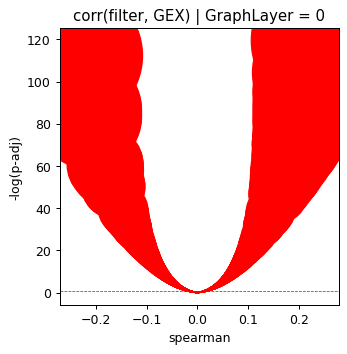

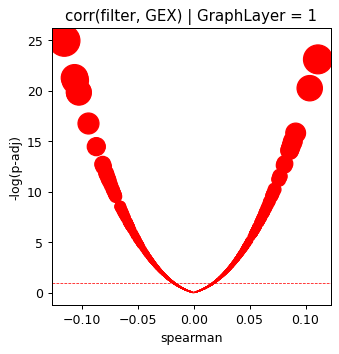

In [260]:
rcParams["figure.figsize"] = 4, 4
rcParams["figure.dpi"] = 90

for optimize_log_dynamic, grp in res.groupby("opt_log_dynamic"):
    grp["minus_log10_pval"] = -np.log10(grp["p_val"])
    grp = grp.sort_values("matched")
    plt.scatter(
        grp["spearman"],
        grp["minus_log10_pval"],
        s=np.power(grp["minus_log10_pval"], 2),
        color=np.where(grp["matched"], "red", "blue"),
    )
    plt.ylabel("-log(p-adj)")
    plt.xlabel("spearman")
    plt.title("corr(filter, GEX) | GraphLayer = %i" % optimize_log_dynamic)
    plt.axhline(1, ls="--", color="red", lw=0.6)
    plt.show()

In [261]:
# sc.pl.umap(ad, color=[96], cmap='RdBu_r')
# sc.pl.umap(rna_sel, color=['Ehf', 'Ergic2'], cmap='plasma')

Text(0, 0.5, '# associations')

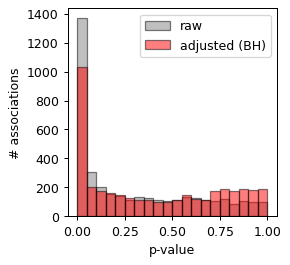

In [262]:
rcParams["figure.figsize"] = 3, 3
rcParams["figure.dpi"] = 90
plt.hist(res["p_val"], color="gray", bins=20, label="raw", alpha=0.5, edgecolor="black")
plt.hist(res["p_adj"], color="red", bins=20, label="adjusted (BH)", alpha=0.5, edgecolor="black")
plt.xlabel("p-value")
plt.legend()
plt.ylabel("# associations")

In [263]:
res[res["p_adj"] < 0.05]

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman  \
4             1            False             2      Pdx1     True  0.032841   
14            1            False             2      Pax4     True -0.033665   
17            7            False             8    Arxes2     True  0.034815   
19            7            False             8       Arx     True -0.081863   
20            9            False            10  Hnf1aos1     True  0.035551   
...         ...              ...           ...       ...      ...       ...   
3842        262             True           263    Tfap2c     True  0.027537   
3847        264             True           265      Ctcf     True  0.046348   
3849        267             True           268     Plag1     True -0.028093   
3854        280             True           281   Pax6os1     True -0.041961   
3856        280             True           281      Pax6     True -0.080454   

             p_val module_name         p_adj            k  
4     3.006220e-03        HD/2  1.455961e-02       Pdx1_2  
14    2.353099e-03        HD/2  1.184219e-02       Pax4_2  
17    1.657269e-03        HD/8  8.787167e-03     Arxes2_8  
19    1.295229e-13        HD/8  3.845833e-12        Arx_8  
20    1.317555e-03       HD/10  7.163043e-03  Hnf1aos1_10  
...            ...         ...           ...          ...  
3842  1.285757e-02     TFAP2/2  4.823149e-02   Tfap2c_263  
3847  2.806301e-05        CTCF  2.391241e-04     Ctcf_265  
3849  1.115049e-02       PLAG1  4.317042e-02    Plag1_268  
3854  1.495984e-04       PAX/1  1.075326e-03  Pax6os1_281  
3856  3.368429e-13       PAX/1  9.490611e-12     Pax6_281  

[1033 rows x 10 columns]

In [264]:
pval_thr = 1e-5
sel_genes = set(list(res[res["p_adj"] < pval_thr]["gene_name"]))

In [265]:
log_act = ad.obsm["log_activities"].copy()

In [266]:
log_act.shape

(8161, 288)

In [267]:
cols_act = ["intercept", "dinuc_bias"] + [name_by_filter_id[k] for k in log_act.columns[2:]]
log_act.columns = cols_act

In [268]:
log_act

intercept  dinuc_bias          HD/1      HD/2  \
AAACAGCCAACAGCCT-1-0  3.806271e-08    0.000003  7.695544e-05  0.000185   
AAACAGCCAACCCTCC-1-0 -1.162185e-07   -0.000003  4.249436e-07 -0.001115   
AAACAGCCACTAAGCC-1-0  1.481323e-06   -0.000031  4.224365e-04  0.061922   
AAACAGCCAGGATAAC-1-0 -2.535439e-08   -0.000002 -6.218390e-06 -0.000374   
AAACAGCCATAAAGCA-1-0  1.866635e-07    0.000009  1.157708e-04  0.001055   
...                            ...         ...           ...       ...   
TTTGTGTTCACGAATC-1-1 -3.571261e-08   -0.000003 -2.040713e-05 -0.000369   
TTTGTGTTCGAGCTAT-1-1 -3.510256e-08   -0.000002  2.103153e-05 -0.000582   
TTTGTGTTCTCAATGA-1-1 -4.718245e-08   -0.000003 -3.709015e-05 -0.000300   
TTTGTTGGTATTGAGT-1-1 -3.771812e-08   -0.000003 -1.994044e-05 -0.000378   
TTTGTTGGTTGTTGCT-1-1 -4.738262e-08   -0.000003 -3.046263e-05 -0.000377   

                          HD/3      HD/4      HD/5      HD/6      HD/7  \
AAACAGCCAACAGCCT-1-0  0.000027  0.000018  0.000150  0.000090  0.000008   
AAACAGCCAACCCTCC-1-0 -0.000109 -0.000263 -0.000553 -0.000185 -0.001000   
AAACAGCCACTAAGCC-1-0  0.004885  0.001461  0.002665  0.008734  0.030506   
AAACAGCCAGGATAAC-1-0 -0.000033 -0.000034 -0.000129 -0.000039 -0.000187   
AAACAGCCATAAAGCA-1-0  0.000114  0.000441  0.000247  0.000247  0.000514   
...                        ...       ...       ...       ...       ...   
TTTGTGTTCACGAATC-1-1 -0.000042 -0.000082 -0.000164 -0.000066 -0.000259   
TTTGTGTTCGAGCTAT-1-1 -0.000046 -0.000057 -0.000249 -0.000077 -0.000564   
TTTGTGTTCTCAATGA-1-1 -0.000047 -0.000153 -0.000134 -0.000069 -0.000327   
TTTGTTGGTATTGAGT-1-1 -0.000042 -0.000116 -0.000139 -0.000064 -0.000266   
TTTGTTGGTTGTTGCT-1-1 -0.000069 -0.000157 -0.000204 -0.000086 -0.000439   

                          HD/8  ...   GMEB2/2   GMEB2/3     FOX/9     SIX/2  \
AAACAGCCAACAGCCT-1-0  0.000290  ...  0.000683  0.000745  0.000040 -0.000298   
AAACAGCCAACCCTCC-1-0 -0.002746  ... -0.000548 -0.005312 -0.000712 -0.001427   
AAACAGCCACTAAGCC-1-0 -0.058731  ... -0.048243  0.090099  0.075321  0.071688   
AAACAGCCAGGATAAC-1-0 -0.000504  ... -0.000163 -0.000923 -0.000504 -0.000577   
AAACAGCCATAAAGCA-1-0  0.003035  ...  0.002118  0.002020  0.003678  0.002987   
...                        ...  ...       ...       ...       ...       ...   
TTTGTGTTCACGAATC-1-1 -0.000607  ... -0.000259 -0.001202 -0.000679 -0.000618   
TTTGTGTTCGAGCTAT-1-1 -0.001008  ... -0.000085 -0.001882 -0.000534 -0.001164   
TTTGTGTTCTCAATGA-1-1 -0.000638  ... -0.000368 -0.001265 -0.000826 -0.000719   
TTTGTTGGTATTGAGT-1-1 -0.000597  ... -0.000290 -0.001464 -0.000433 -0.000576   
TTTGTTGGTTGTTGCT-1-1 -0.001027  ... -0.000442 -0.001635 -0.000916 -0.000986   

                         PAX/1     PAX/2  PAX-halfsite       AHR  KLF/SP/3  \
AAACAGCCAACAGCCT-1-0  0.000297  0.000039      0.000093  0.002540 -0.000023   
AAACAGCCAACCCTCC-1-0 -0.005037 -0.000265     -0.002616 -0.003395 -0.000373   
AAACAGCCACTAAGCC-1-0  0.167776  0.009557      0.061679 -0.104413  0.061235   
AAACAGCCAGGATAAC-1-0 -0.000655 -0.000044     -0.000708 -0.002082  0.000082   
AAACAGCCATAAAGCA-1-0  0.003853  0.000299      0.001518  0.003987  0.001712   
...                        ...       ...           ...       ...       ...   
TTTGTGTTCACGAATC-1-1 -0.000922 -0.000043     -0.000762 -0.001915 -0.000268   
TTTGTGTTCGAGCTAT-1-1 -0.000909 -0.000017     -0.001656 -0.002895 -0.000303   
TTTGTGTTCTCAATGA-1-1 -0.001065 -0.000046     -0.000662 -0.001764 -0.000471   
TTTGTTGGTATTGAGT-1-1 -0.000906 -0.000041     -0.000935 -0.001973 -0.000344   
TTTGTTGGTTGTTGCT-1-1 -0.000826 -0.000029     -0.001108 -0.002171 -0.000469   

                        ZSCAN4  
AAACAGCCAACAGCCT-1-0  0.000095  
AAACAGCCAACCCTCC-1-0 -0.000473  
AAACAGCCACTAAGCC-1-0 -0.030773  
AAACAGCCAGGATAAC-1-0 -0.000144  
AAACAGCCATAAAGCA-1-0  0.000473  
...                        ...  
TTTGTGTTCACGAATC-1-1 -0.000198  
TTTGTGTTCGAGCTAT-1-1 -0.000225  
TTTGTGTTCTCAATGA-1-1 -0.000174  
TTTGTTGGTATTGAGT-1-1 -0.000205 

In [269]:
import anndata


ad_act = anndata.AnnData(log_act)

ad_act.obsm["X_umap"] = ad.obsm["X_umap"]

ad_act.obs = ad.obs

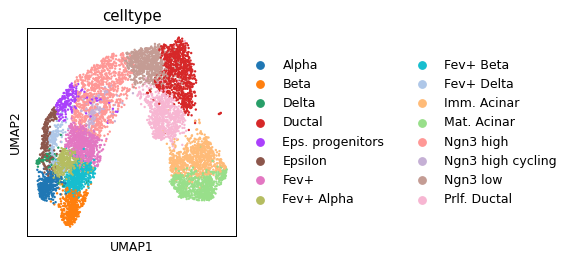

In [270]:
sc.pl.umap(ad_act, color="celltype")

Rank genes groups using the annotation

In [271]:
sc.tl.rank_genes_groups(ad_act, "celltype")
rkg_df = []
for ct in ad_act.obs["celltype"].values.unique():
    print(ct)
    rkg_df2 = sc.get.rank_genes_groups_df(ad_act, ct)
    rkg_df2["celltype"] = ct
    rkg_df.append(rkg_df2)
rkg_df = pd.concat(rkg_df)
rkg_df["module_name"] = rkg_df["names"].map(anno.set_index("Cluster_ID")["Name"].to_dict())
rkg_df["module_name"] = np.where(~pd.isnull(rkg_df["module_name"]), rkg_df["module_name"], rkg_df["names"])
rkg_df.head()

Fev+ Alpha
Fev+
Ngn3 high
Eps. progenitors
Ngn3 low
Fev+ Beta
Ductal
Fev+ Delta
Imm. Acinar
Alpha
Prlf. Ductal
Epsilon
Ngn3 high cycling
Beta
Delta
Mat. Acinar


names    scores  logfoldchanges     pvals  pvals_adj    celltype  \
0     GCM  0.910906        3.654080  0.362733   0.627158  Fev+ Alpha   
1  ZNF431  0.515329        4.179523  0.606397   0.835609  Fev+ Alpha   
2   NR/15  0.422957             NaN  0.672541   0.905102  Fev+ Alpha   
3   HD/16  0.403896             NaN  0.686494   0.916561  Fev+ Alpha   
4   ARI5B  0.402635             NaN  0.687421   0.916561  Fev+ Alpha   

  module_name  
0         GCM  
1      ZNF431  
2       NR/15  
3       HD/16  
4       ARI5B

Get top modules

In [272]:
ad_act.var_names = ad_act.var_names.map(rkg_df.set_index("names")["module_name"].to_dict())

In [273]:
sc.tl.rank_genes_groups(ad_act, "celltype")

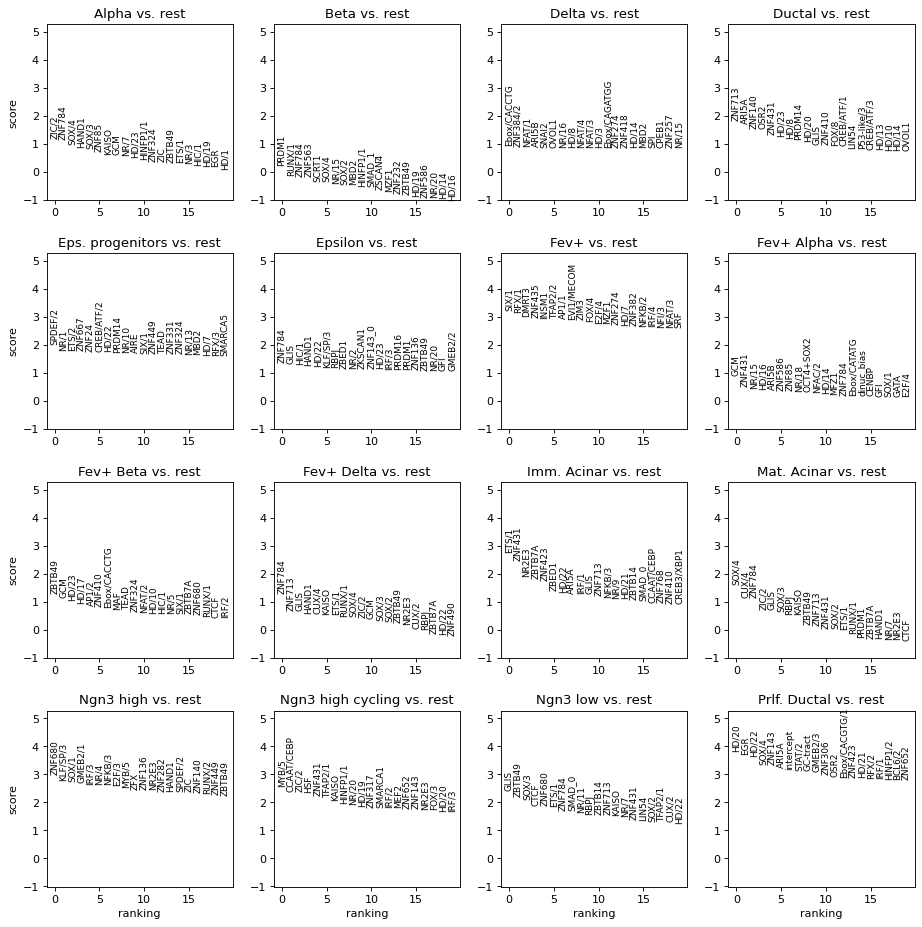

In [274]:
rcParams["figure.figsize"] = 3.5, 3.5
rcParams["figure.dpi"] = 80
sc.pl.rank_genes_groups(ad_act)

In [275]:
set(res[(res["p_adj"] < 1e-5)]["k"])

{'Araf_248',
 'Arc_248',
 'Arcn1_248',
 'Arel1_248',
 'Arf3_248',
 'Arf5_248',
 'Arf6_248',
 'Arfgap1_248',
 'Arfgap3_248',
 'Arfgef1_248',
 'Arfgef2_248',
 'Arfgef3_248',
 'Arhgap10_248',
 'Arhgap11a_248',
 'Arhgap18_248',
 'Arhgap19_248',
 'Arhgap21_248',
 'Arhgap24_248',
 'Arhgap26_248',
 'Arhgap28_248',
 'Arhgap32_248',
 'Arhgap35_248',
 'Arhgap36_248',
 'Arhgap42_248',
 'Arhgap5_248',
 'Arhgap6_248',
 'Arhgdig_248',
 'Arhgef11_248',
 'Arhgef12_248',
 'Arhgef19_248',
 'Arhgef26_248',
 'Arhgef38_248',
 'Arhgef39_248',
 'Arhgef40_248',
 'Arhgef5_248',
 'Arhgef6_248',
 'Arhgef7_248',
 'Arhgef9_248',
 'Arid1b_248',
 'Arid2_248',
 'Arid3b_248',
 'Arid4b_248',
 'Arih1_248',
 'Arih2_248',
 'Arl13b_248',
 'Arl15_248',
 'Arl3_248',
 'Arl4a_248',
 'Arl4c_248',
 'Arl6ip1_248',
 'Arl6ip4_248',
 'Arl8a_248',
 'Armc4_248',
 'Armc8_248',
 'Armc9_248',
 'Armh3_248',
 'Arnt_248',
 'Arpc1a_248',
 'Arpc1b_248',
 'Arpc2_248',
 'Arpc5_248',
 'Arpc5l_248',
 'Arpp19_248',
 'Arrdc4_248',
 'Arsa_248',
 'Ar

In [276]:
res[res["module_name"].str.contains("HD")].sort_values("p_adj")

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman  \
42           20            False            21      Pdx1     True  0.085723   
19            7            False             8       Arx     True -0.081863   
1940          1             True             2      Isl1     True -0.075389   
25           11            False            12      Pbx1     True  0.065727   
1971         18             True            19     Meis1     True  0.053219   
...         ...              ...           ...       ...      ...       ...   
1973         20             True            21      Pbx2     True -0.002056   
1937          1             True             2    Dlx1as     True -0.001950   
46           23            False            24    Arid3a     True -0.001547   
2             1            False             2    Arid3b     True  0.000642   
13            1            False             2      Mnx1     True -0.000469   

             p_val module_name         p_adj          k  
42    8.687087e-15       HD/16  2.865996e-13    Pdx1_21  
19    1.295229e-13        HD/8  3.845833e-12      Arx_8  
1940  9.154130e-12        HD/2  2.222323e-10     Isl1_2  
25    2.795715e-09       HD/12  5.042739e-08    Pbx1_12  
1971  1.506326e-06       HD/14  1.680467e-05   Meis1_19  
...            ...         ...           ...        ...  
1973  8.526826e-01       HD/16  9.218578e-01    Pbx2_21  
1937  8.602075e-01        HD/2  9.268220e-01   Dlx1as_2  
46    8.888475e-01       HD/18  9.415344e-01  Arid3a_24  
2     9.537659e-01        HD/2  9.767940e-01   Arid3b_2  
13    9.662018e-01        HD/2  9.827507e-01     Mnx1_2  

[68 rows x 10 columns]

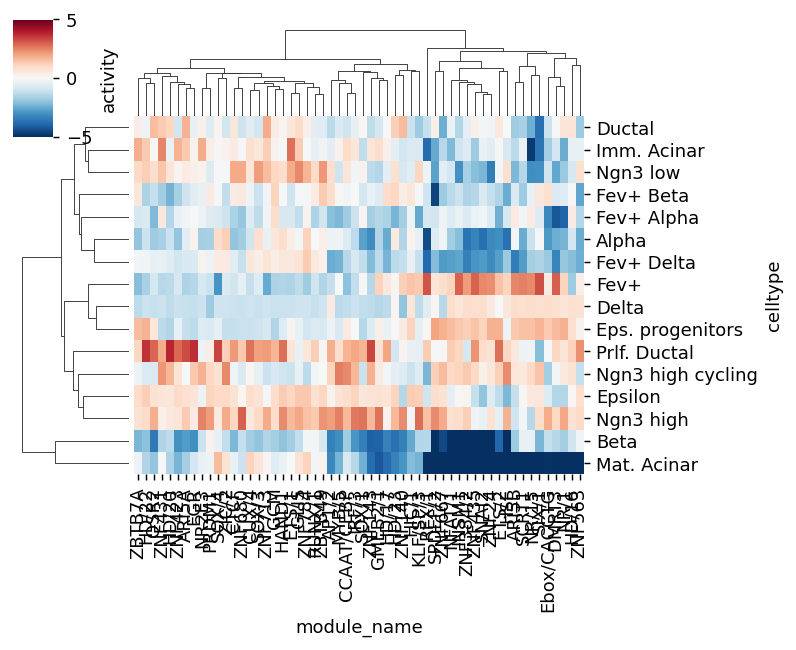

In [277]:
mod_names_best = set(rkg_df.sort_values("scores", ascending=False).groupby("celltype").head(5)["module_name"])
best = rkg_df[rkg_df["module_name"].isin(mod_names_best)]
rcParams["figure.dpi"] = 130
sns.clustermap(
    best.pivot(index="celltype", columns="module_name", values="scores"),
    cbar_kws={"label": "activity"},
    cmap="RdBu_r",
    vmin=-5,
    vmax=5,
    figsize=[6.2, 5],
    # dpi=100,
    xticklabels=True,
)

In [278]:
rna_tfs = rna_sel.to_df()[list(set(res["gene_name"]))]
rna_tfs["celltype"] = rna_sel.obs["celltype"]
mean_tfs = rna_tfs.groupby("celltype").mean()

act_tfs_df = ad_act.to_df()
act_tfs_df["celltype"] = ad_act.obs["celltype"]
mean_act_tf = act_tfs_df.groupby("celltype").mean()

In [279]:
corr_celltype = []
for i, c1 in enumerate(mean_act_tf):
    if i % 50 == 0:
        print(i, mean_act_tf.shape[1])
    for j, c2 in enumerate(mean_tfs):
        if not c1 in genes_by_module_name or not c2 in genes_by_module_name[c1]:
            continue
        a = mean_act_tf[c1]
        b = mean_tfs[c2]
        corr_celltype.append([c1, c2, mean_act_tf.index[np.argmax(mean_act_tf[c1])]] + list(pearsonr(a, b)))

corr = pd.DataFrame(corr_celltype, columns=["module_name", "gene_name", "cell_type", "pearsonr", "p_val"])
corr = corr.sort_values("pearsonr", ascending=False)

0 288
50 288
100 288
150 288
200 288
250 288


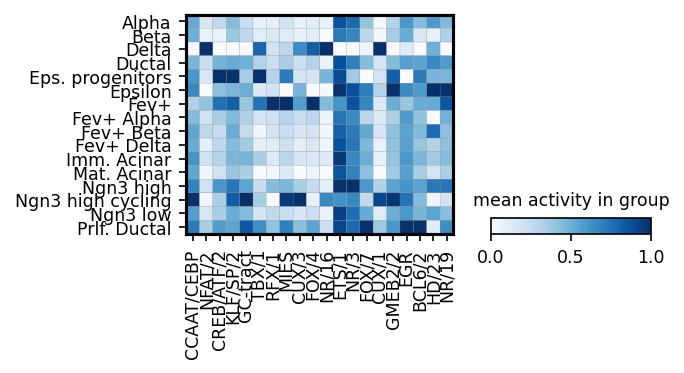

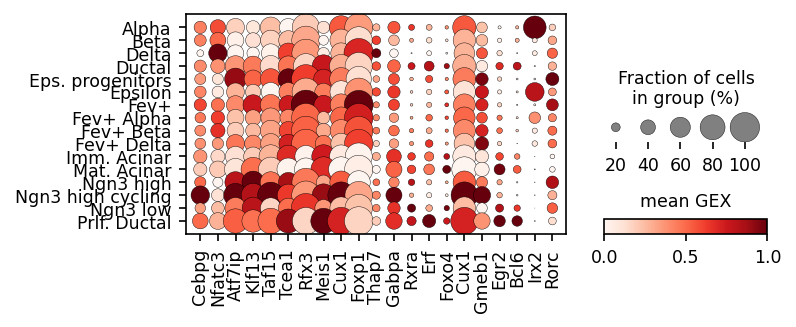

In [280]:
rcParams['figure.dpi'] = 150
# activators
module_names = corr[corr['pearsonr'] > 0].sort_values('p_val').sort_values('p_val').groupby('cell_type').head(3)['module_name'].drop_duplicates()
gene_names   = corr[corr['pearsonr'] > 0].sort_values('p_val').sort_values('p_val').groupby('cell_type').head(3)['gene_name']
sc.pl.matrixplot(ad_act,
            groupby=cell_type_key,
            cmap='Blues',
            show=False,
            var_names=module_names,
            figsize=[4, 1.9],
            standard_scale='var',
            colorbar_title='mean activity in group')

plt.savefig('../../../output/filter_activities_pancreatic_endocrinogenesis.pdf')
plt.show()

sc.pl.dotplot(rna_sel,
              groupby=cell_type_key,
              standard_scale='var',
              show=False,
              colorbar_title='mean GEX',
              var_names=gene_names,
              figsize=[5, 1.9])

plt.savefig('../../../output/gene_expression_pancreatic_endocrinogenesis.pdf')
plt.show()



In [281]:
module_names

171     CCAAT/CEBP
1468        NFAT/2
156     CREB/ATF/2
1520      KLF/SP/2
1554      GC-tract
284          TBX/1
1713         RFX/1
280           MIES
37           CUX/3
1363         FOX/4
112          NR/16
1447         ETS/1
65            NR/3
1621         FOX/7
36           CUX/1
1920       GMEB2/2
1527           EGR
1634        BCL6/2
1685         HD/23
133          NR/19
Name: module_name, dtype: object

In [282]:
module_names

171     CCAAT/CEBP
1468        NFAT/2
156     CREB/ATF/2
1520      KLF/SP/2
1554      GC-tract
284          TBX/1
1713         RFX/1
280           MIES
37           CUX/3
1363         FOX/4
112          NR/16
1447         ETS/1
65            NR/3
1621         FOX/7
36           CUX/1
1920       GMEB2/2
1527           EGR
1634        BCL6/2
1685         HD/23
133          NR/19
Name: module_name, dtype: object

In [283]:
module_names.map(res.set_index('module_name')['filter_id'].to_dict())

171      51
1468     98
156      49
1520    108
1554    112
284      69
1713    246
280      68
37       14
1363     78
112      44
1447     97
65       31
1621    163
36       13
1920    276
1527    110
1634    169
1685    203
133      47
Name: module_name, dtype: int64

True
1
order 171      51
1468     98
156      49
1520    108
1554    112
284      69
1713    246
280      68
37       14
1363     78
112      44
1447     97
65       31
1621    163
36       13
1920    276
1527    110
1634    169
1685    203
133      47
Name: module_name, dtype: int64
0 out of 288...
10 out of 288...


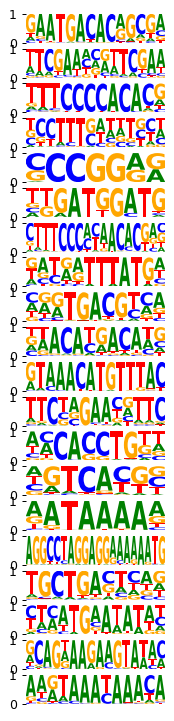

In [284]:
mb.pl.set_rcParams({"figure.figsize": [2, 20], "figure.dpi": 90})
mb.pl.logo(
    model,
    title=False,
    xticks=False,
    rowspan_dinuc=0,
    rowspan_mono=1,
    n_rows=40,
    # stop_at=11,
    show=False,
    # n_rows=len(res.head(20).index),
    n_cols=1,
    order=module_names.map(res.set_index('module_name')['filter_id'].to_dict()),
)  # n_cols=len(reduced_groups))
# plt.tight_layout()

plt.savefig('../../../output/motif_pancreatic_endocrinogenesis.pdf')
plt.show()


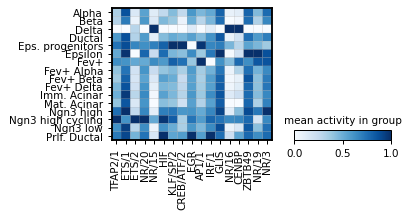

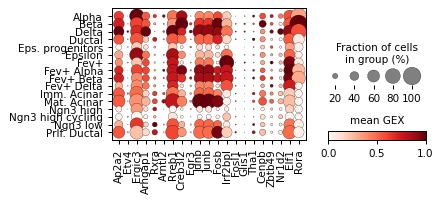

In [285]:
# repressors
module_names = corr[corr['pearsonr'] < 0].sort_values('p_val').sort_values('p_val').groupby('cell_type').head(3)['module_name'].drop_duplicates()
gene_names   = corr[corr['pearsonr'] < 0].sort_values('p_val').sort_values('p_val').groupby('cell_type').head(3)['gene_name']
sc.pl.matrixplot(ad_act,
            groupby=cell_type_key,
            cmap='Blues',
            var_names=module_names,
            figsize=[4, 1.9],
            standard_scale='var',
            colorbar_title='mean activity in group')
sc.pl.dotplot(rna_sel,
              groupby=cell_type_key,
              colorbar_title='mean GEX',
              standard_scale='var',
              var_names=gene_names,
              figsize=[4.5, 1.9])



In [286]:
# sc.pl.dotplot(rna_sel, groupby='celltype', var_names=list(set(res['gene_name'])))

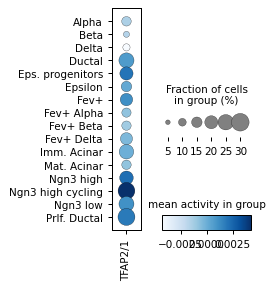

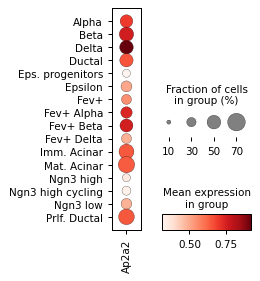

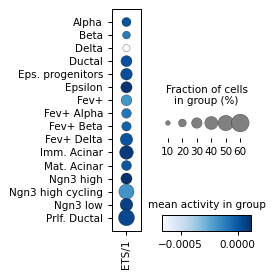

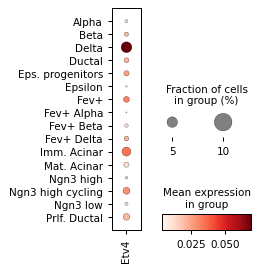

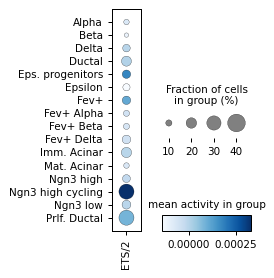

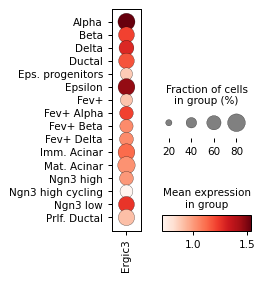

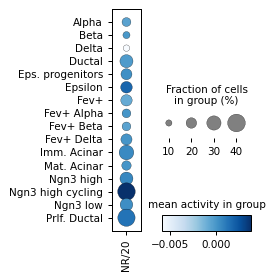

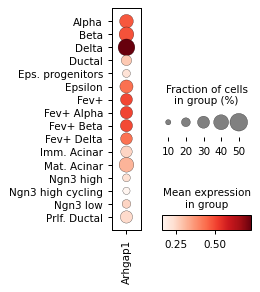

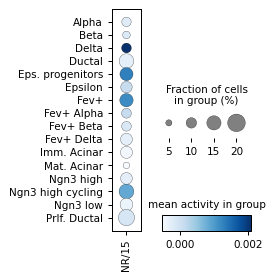

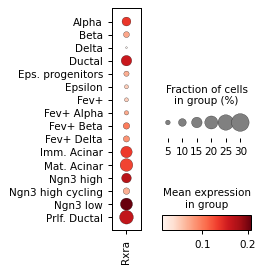

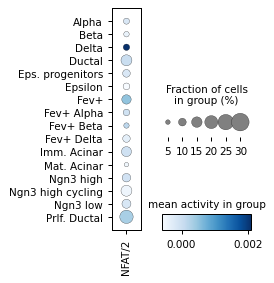

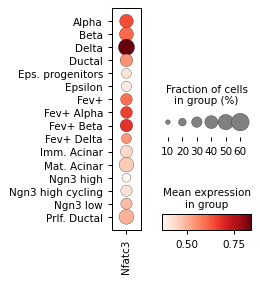

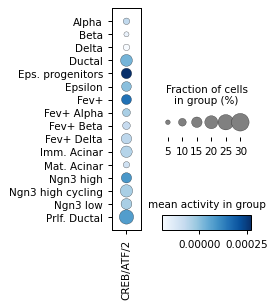

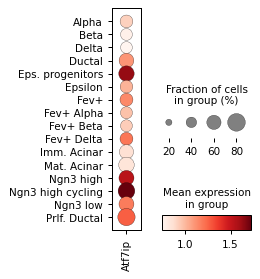

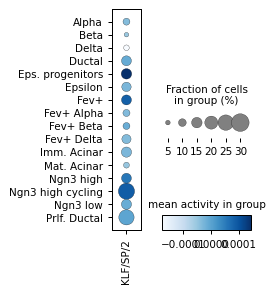

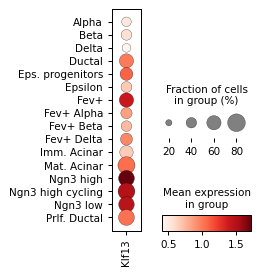

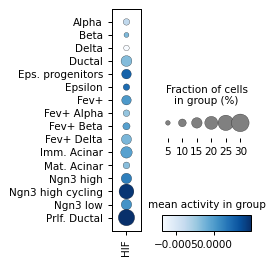

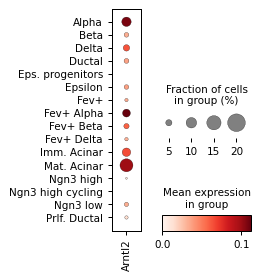

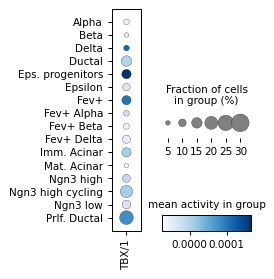

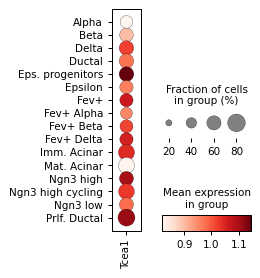

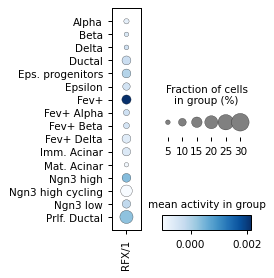

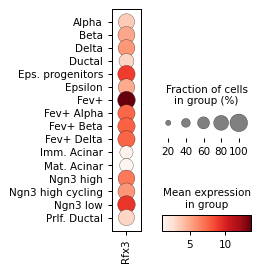

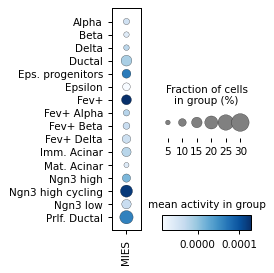

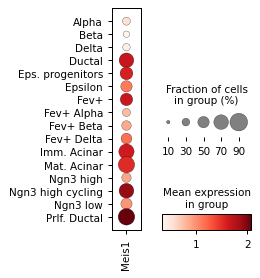

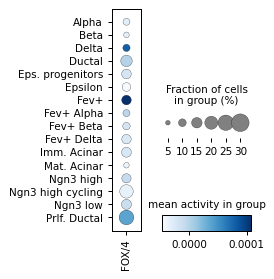

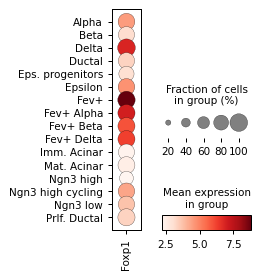

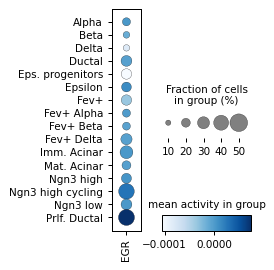

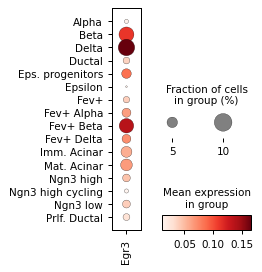

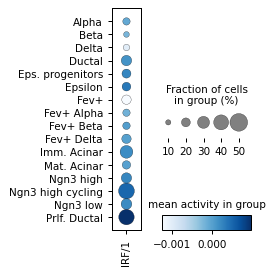

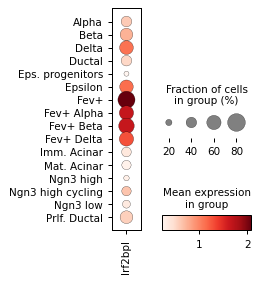

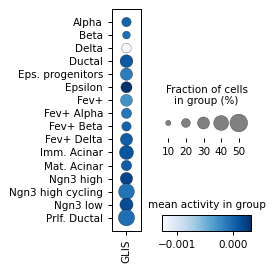

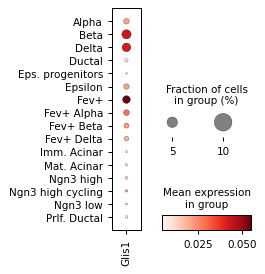

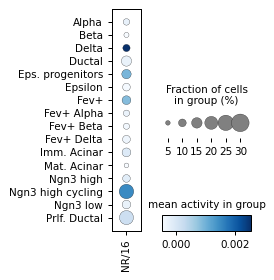

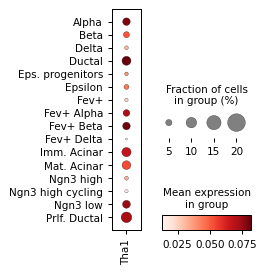

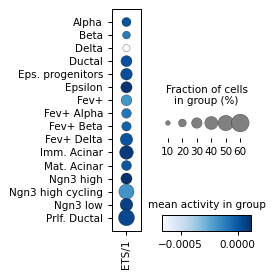

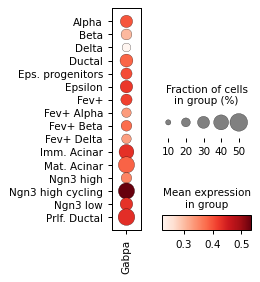

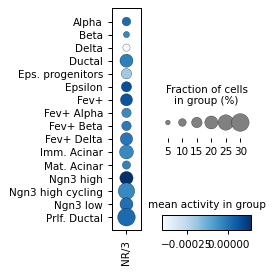

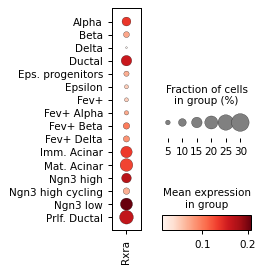

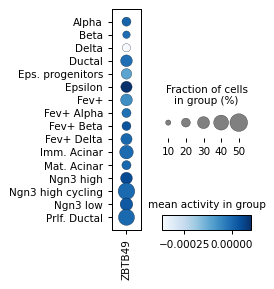

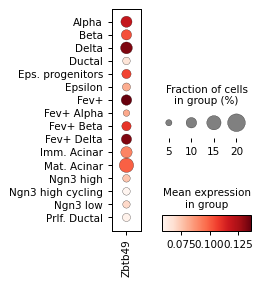

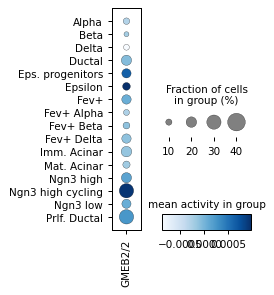

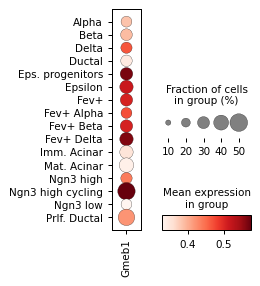

In [287]:
for ri, r in corr.sort_values("p_val").groupby("cell_type").head(3).iterrows():
    # ad_act.obs['HD/2'] = log_act['HD/2']
    sc.pl.dotplot(
        ad_act,
        groupby="celltype",
        cmap="Blues",
        var_names=r["module_name"],
        figsize=[2, 3.2],
        colorbar_title="mean activity in group",
    )
    sc.pl.dotplot(rna_sel, groupby="celltype", var_names=r["gene_name"], figsize=[2, 3.2])

## Filter activities versus graph activities

In [288]:
A = model.get_log_activities()
sum_A = A.abs().sum(axis=1).cpu().detach().numpy()
A = A.squeeze(0)
print(A.shape)

torch.Size([288, 8161])


In [289]:
# this function assesses the contributions of A on the graph
indices, contributions, max_eig = mb.tl.compute_contributions(A, C * D)

contributions_normalized = torch.abs(contributions) / max_eig
contributions_df = pd.DataFrame(contributions_normalized.detach(), columns=["index"])
print("Summary statistics of the normalized contributions: \n")
contributions_df.describe()

Summary statistics of the normalized contributions: 



index
count  288.000000
mean     0.377669
std      0.044241
min      0.277877
25%      0.344784
50%      0.377112
75%      0.407361
max      0.496438

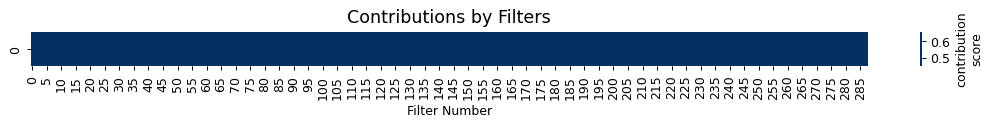

In [290]:
mb.pl.filter_contrib_heatmap(contributions_normalized)

Percentage of non-zero entries of the filter matrix A: 100.0 %
(288,) (288,)


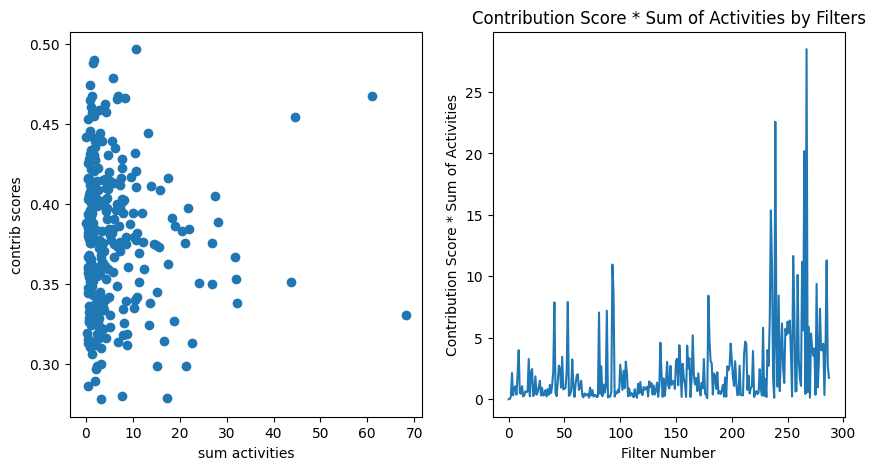

In [291]:
from matplotlib.pyplot import rcParams

rcParams["figure.dpi"] = 100
plt.figure(figsize=(10, 5))

print(f"Percentage of non-zero entries of the filter matrix A: {100 * torch.sum(A != 0).item() / A.numel()} %")

mb.pl.filter_contrib_simple(contributions_normalized, A.cpu())

In [292]:
# normalize the data, and look at summary stats
sum_A_norm = sum_A / np.max(sum_A)
sum_A_df = pd.DataFrame(sum_A.T, columns=["sum_A"])
sum_A_df.describe()

sum_A
count  288.000000
mean     5.957136
std      8.597739
min      0.000547
25%      1.099398
50%      2.910393
75%      7.284939
max     68.284973

In [293]:
contrib_arr = contributions_normalized.unsqueeze(dim=0).detach().numpy()
sum_A = A.cpu().abs().sum(axis=1).detach().numpy()
contrib = contrib_arr[0]

contrib_times_activities = contrib * sum_A
contrib_times_activities_norm = contrib_times_activities / np.max(contrib_times_activities)
contrib_times_activities_df = pd.DataFrame(contrib_times_activities, columns=["contribution_times_activities"])
contrib_times_activities_df.describe()

contribution_times_activities
count                     288.000000
mean                        2.240533
std                         3.305930
min                         0.000212
25%                         0.422305
50%                         1.031060
75%                         2.731772
max                        28.479589

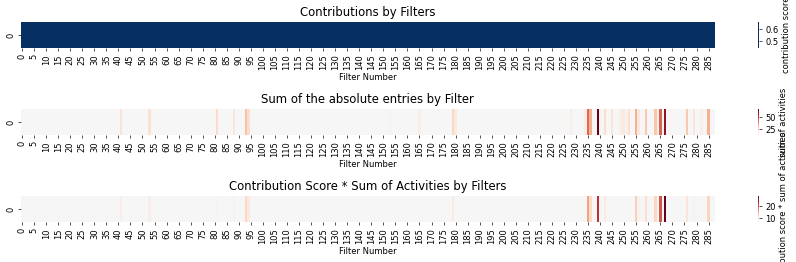

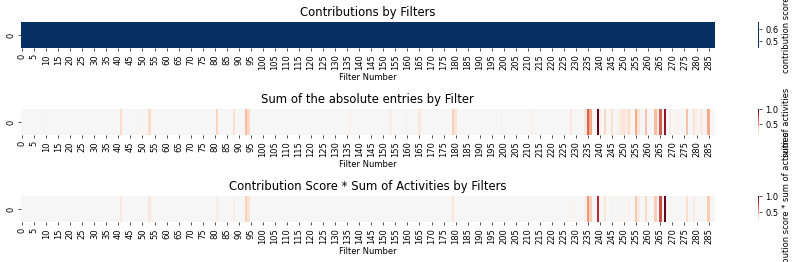

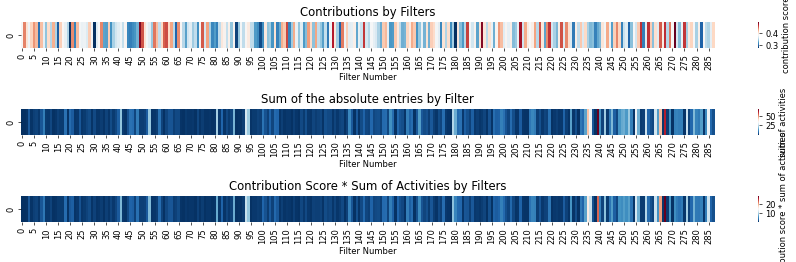

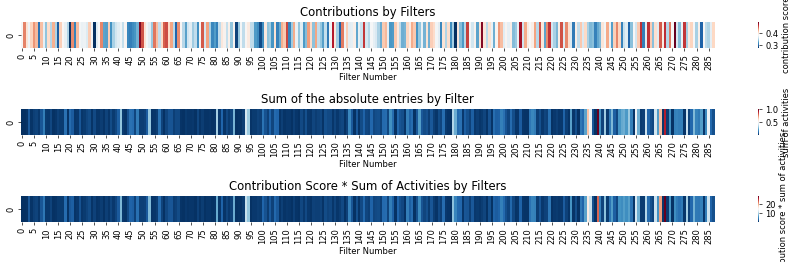

In [294]:
from matplotlib.pyplot import rcParams

rcParams["figure.dpi"] = 60

# unsqueeze the data to make it compatible with the heatmap function
sum_A_norm = sum_A_norm.reshape(1, -1)
contrib_times_activities = contrib_times_activities.reshape(1, -1)


# only plotting filters, that are within the top 25% of the maximum contribution score
mb.pl.contrib_heatmaps(
    contributions_normalized, sum_A.reshape(1, -1), contrib_times_activities, (0.66, 11.85, 6.49), (0.66, 11.85, 6.49)
)  # vmin values come from the describe() functions

# plotting top 25% of filters normalized
mb.pl.contrib_heatmaps(
    contributions_normalized,
    sum_A_norm,
    contrib_times_activities_norm.reshape(1, -1),
    vmins=(0.66, 0.14, 0.19),
    centers=(0.66, 0.14, 0.19),
)  # vmin values come from the describe() functions

# plotting all filter
mb.pl.contrib_heatmaps(contributions_normalized, sum_A.reshape(1, -1), contrib_times_activities)

# plotting all filters normalized
mb.pl.contrib_heatmaps(contributions_normalized, sum_A_norm, contrib_times_activities)

In [295]:
anno[anno['Name'] == 'TFAP2/1']

Cluster_ID     Name   DBD            Seed_motif  Total_width  \
215         264  TFAP2/1  TFAP  AP2A_HUMAN.H11MO.0.A           15   

     Consensus_left  Consensus_right  Cluster_size Name_unique  
215               3               12            24     TFAP2/1

In [296]:
# grnpedia associations
ttrust = pd.read_csv('https://www.grnpedia.org/trrust/data/trrust_rawdata.mouse.tsv',
                     sep='\t',
                     header=None)
ttrust.columns = ['tf', 'target', 'role', 'ref']
ttrust = ttrust.groupby(['tf', 'role']).size().reset_index().pivot(index='tf', columns='role', values=0).fillna(0)
ttrust['consensus'] = np.where((ttrust['Activation'] > 0) & (ttrust['Repression'] == 0), 'red',
                               np.where((ttrust['Repression'] > 0) & (ttrust['Activation'] == 0), 'blue', 'purple'))

In [297]:
res[res['module_name'] == 'SOX/3']

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman  \
1403         91            False            92     Sox13     True -0.019356   
1404         91            False            92      Sox9     True  0.112574   
1405         91            False            92     Sox12     True  0.004646   
1406         91            False            92     Sox11     True -0.000002   
1407         91            False            92     Sox30     True  0.022332   
1408         91            False            92     Sox10     True  0.004463   
1409         91            False            92      Sox8     True  0.013017   
3333         91             True            92     Sox13     True -0.003547   
3334         91             True            92      Sox9     True  0.037916   
3335         91             True            92     Sox12     True -0.023356   
3336         91             True            92     Sox11     True  0.024678   
3337         91             True            92     Sox30     True -0.003407   
3338         91             True            92     Sox10     True  0.011439   
3339         91             True            92      Sox8     True  0.002815   

             p_val module_name         p_adj         k  
1403  8.037954e-02       SOX/3  1.974952e-01  Sox13_92  
1404  1.970287e-24       SOX/3  1.311260e-22   Sox9_92  
1405  6.747168e-01       SOX/3  8.159169e-01  Sox12_92  
1406  9.998756e-01       SOX/3  9.998756e-01  Sox11_92  
1407  4.365840e-02       SOX/3  1.264612e-01  Sox30_92  
1408  6.868651e-01       SOX/3  8.237248e-01  Sox10_92  
1409  2.396776e-01       SOX/3  4.317106e-01   Sox8_92  
3333  7.486992e-01       SOX/3  8.619085e-01  Sox13_92  
3334  6.127002e-04       SOX/3  3.724445e-03   Sox9_92  
3335  3.486919e-02       SOX/3  1.065360e-01  Sox12_92  
3336  2.578970e-02       SOX/3  8.429149e-02  Sox11_92  
3337  7.582867e-01       SOX/3  8.665619e-01  Sox30_92  
3338  3.014702e-01       SOX/3  5.088216e-01  Sox10_92  
3339  7.992993e-01       SOX/3  8.881103e-01   Sox8_92

In [298]:
# res_sel[res_sel['module_name'] == 'SOX/3']

INSM1:Insm1 (0.4666626275484559, 0.11872041211058683) 0.14721128344535828 red
NR/11:Nr5a2 (0.33768036563663545, 0.20596454696987207) 0.21196624636650085 red
CCAAT/CEBP:Dbpht2 (0.18670531302350346, -0.20793331561114306) 0.10485882312059402 gray
TFAP2/1:Ap2b1 (0.17317236248329115, -0.040291642380638606) 0.15999287366867065 gray
SOX/3:Sox9 (0.171439195824706, 0.11925561357179097) 0.1335025131702423 purple
PROX1:Prox1 (0.11803594041115147, 0.040945291841136766) 0.16746491193771362 purple
GLI:Zbtb7c (0.11060836317953879, -0.08270770345670293) 0.09551192820072174 gray
SOX/4:Sox9 (0.0916224364773466, 0.12256591744599149) 0.08338265866041183 purple
MYB/2:Mybl1 (0.08792261764656721, 0.06485767023113745) 0.12227752804756165 purple
NR/20:Arid4b (0.08190919185029863, -0.20610204564363444) 0.06776829063892365 gray


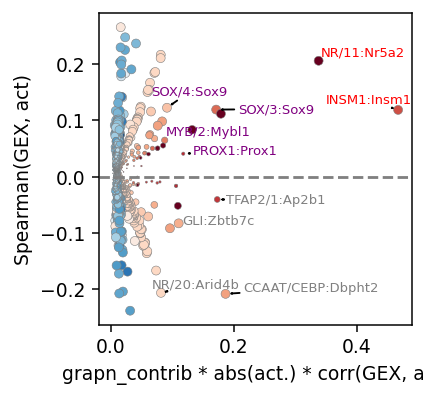

In [299]:
rcParams['figure.figsize'] = 3, 3
rcParams['figure.dpi'] = 135
rcParams['pdf.fonttype'] = 42
from adjustText import adjust_text

def delta_models(model_by_logdynamic):
    model = model_by_logdynamic[True]
    log_act1 = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)
    log_act1 = pd.DataFrame(log_act1.detach().cpu().numpy())

    model = model_by_logdynamic[False]
    log_act2 = torch.stack(list(model.activities.log_activities), dim=1).squeeze(0)
    log_act2 = pd.DataFrame(log_act2.detach().cpu().numpy())

    d = log_act1.mean(axis=0) - log_act2.mean(axis=0)
    # d.index = ad.obs_names
    return d

# graph = True - graph = False
delta_model = delta_models(model_by_logdynamic)
delta_model
delta_model = delta_model[2:]
delta_model.index = range(len(delta_model))
delta_model.index += 1
delta_model.index = delta_model.index.map(name_by_filter_id)
delta_model

res['act_change'] = res['module_name'].map(delta_model.to_dict())
res['k'] = res['module_name'] + ':' + res['gene_name']
res['graph_score'] = res['filter_id'].map({i : contrib_times_activities[0][i + 2] for i in range(len(contrib_times_activities[0]) - 2)})
res['z'] = np.sqrt((res['graph_score'] ** 2) * (-np.log(res['p_adj'] + 1e-10)) ** 2)


ax = plt.subplot()
cmap = sns.color_palette('RdBu_r', as_cmap=True)

res_sel = res.sort_values('z', ascending=False)
res_sel = res_sel.sort_values('z', ascending=False) # .drop_duplicates('module_name')
# res_sel = res_sel.drop_duplicates('module_name')

# res_sel['x'] = np.log((res_sel['graph_score'] + 1) * (res_sel['act_change'].abs() + 1))
res_sel['x'] = res_sel['graph_score'] * res_sel['act_change'].abs() * res_sel['spearman'].abs()
# res_sel['x'] = res_sel['act_change'].abs() * res_sel['spearman'].abs()

# general noise stacking of cells on x-y axes
sigma = 0.002
mu =0.01
# generate normally distributed samples
noise = sigma * np.random.randn(res_sel.shape[0]) + mu
res_sel['x'] = res_sel['x'] + noise
res_sel['spearman'] = res_sel['spearman'] + noise


edgecolors = res_sel['gene_name'].map(ttrust['consensus'].to_dict())
edgecolors = np.where(~pd.isnull(edgecolors), edgecolors, 'gray')
res_sel['edgecolors'] = edgecolors

plt.scatter(res_sel['x'],            
            res_sel['spearman'],
            s=-np.log(res_sel['p_adj'] + 1e-10),
            cmap=cmap,
            lw=.3,
            edgecolors='gray',
            c=res_sel['act_change'])
plt.axhline(y=0, ls='--', c='gray')
plt.xlabel('grapn_contrib * abs(act.) * corr(GEX, act)')
plt.ylabel('Spearman(GEX, act)')


res_sel = res_sel.sort_values('x', ascending=False).drop_duplicates('module_name')
texts = [] # [plt.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))]

for ri, r in res_sel.head(10).iterrows():
    print(r['module_name'] + ':' + r['gene_name'], (r['x'], r['spearman']), r['act_change'], r['edgecolors'])
    t = ax.annotate(r['module_name'] + ':' + r['gene_name'], (r['x'], r['spearman']), fontsize=7, color=r['edgecolors'])
    texts.append(t)
adjust_text(texts, arrowprops=dict(arrowstyle='->'))

plt.savefig('../../../output/graph_contribution_pancreatic_endocrinogesis.pdf')
plt.show()

True
1
order 0    91
1    39
2    51
dtype: int64
0 out of 288...


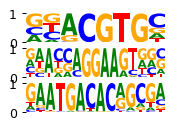

In [300]:
mb.pl.set_rcParams({"figure.figsize": [2, 20], "figure.dpi": 90})
mb.pl.logo(
    model,
    title=False,
    xticks=False,
    rowspan_dinuc=0,
    rowspan_mono=1,
    n_rows=40,
    # stop_at=11,
    show=False,
    # n_rows=len(res.head(20).index),
    n_cols=1,
    order=pd.Series(['SOX/3', 'NR/11', 'CCAAT/CEBP']).map(res.set_index('module_name')['filter_id'].to_dict()),
)  # n_cols=len(reduced_groups))
# plt.tight_layout()

plt.savefig('../../../output/motif_pancreatic_endocrinogenesis.pdf')
plt.show()


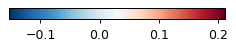

In [301]:
import pylab as pl
import numpy as np

a = np.array([[res_sel['act_change'].min(), res_sel['act_change'].max()]])
pl.figure(figsize=(3, .2))
img = pl.imshow(a, cmap="RdBu_r")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="horizontal", cax=cax)
pl.savefig("../../../output/graph_contribution_pancreatic_endocrinogenesis_cbar.pdf")

In [302]:
scv.tl.velocity_pseudotime(rna)
# scv.pl.scatter(rna, color="velocity_pseudotime", color_map="gnuplot")

computing terminal states
    identified 9 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


In [303]:
def running_mean(y_in, x_in, N_out=101, sigma=.05):
    '''
    Returns running mean as a Bell-curve weighted average at evenly spaced
    points. Does NOT wrap signal around, or pad with zeros.
    
    Arguments:
    y_in -- y values, the values to be smoothed and re-sampled
    x_in -- x values for array
    
    Keyword arguments:
    N_out -- NoOf elements in resampled array.
    sigma -- 'Width' of Bell-curve in units of param x .
    '''
    import numpy as np
    N_in = len(y_in)

    # Gaussian kernel
    x_out = np.linspace(np.min(x_in), np.max(x_in), N_out)
    x_in_mesh, x_out_mesh = np.meshgrid(x_in, x_out)
    gauss_kernel = np.exp(-np.square(x_in_mesh - x_out_mesh) / (2 * sigma**2))
    # Normalize kernel, such that the sum is one along axis 1
    normalization = np.tile(np.reshape(np.sum(gauss_kernel, axis=1), (N_out, 1)), (1, N_in))
    gauss_kernel_normalized = gauss_kernel / normalization
    # Perform running average as a linear operation
    y_out = gauss_kernel_normalized @ y_in

    return y_out, x_out

In [304]:
# prepare velocity pseudotime values for visualization
atac.obs['velocity_pseudotime'] = rna.obs['velocity_pseudotime'].values
ad.obs['velocity_pseudotime'] = atac.obs['velocity_pseudotime']

### Given a few potential genes, verify its association with chromatin targets

In [305]:
def plot_pseudotime(gene_name, filter_name, sigma_gex=.05, sigma_filter=.1, save=None):
    rcParams['figure.figsize'] = 3, 2
    gene_key = gene_name
    x = rna.obs['velocity_pseudotime']
    y = rna[:,rna.var_names==gene_key].X.A.flatten()
    y = np.log(y)
    y[y == -np.inf] = np.nanmin(y[y != -np.inf])

    y_mean, x_mean = running_mean(y, x, sigma=sigma_gex)
    plt.scatter(x, y, edgecolors=None, color='lightgreen', s=.1)
    plt.plot(x_mean, y_mean, color='green')
    plt.ylabel('')
    plt.title(gene_key)
    plt.ylabel('gene expression [log]')
    plt.xlabel('pseudotime')


    x = ad.obs['velocity_pseudotime']

    if save is not None:
        plt.savefig(save + '_gex.pdf')
    plt.show()
    filter_id = int(res[res['module_name'].str.contains(filter_name)]['filter_id'].values[0])

    y= act.T.numpy()[:,filter_id]
    # y = np.abs(y)
    # y = np.log(y)
    # y[y == -np.inf] = np.nanmin(y[y != -np.inf])

    y_mean, x_mean = running_mean(y, x, sigma=sigma_filter)
    # plt.scatter(x, y, edgecolors='black', color='lightgreen', s=.1)
    plt.plot(x_mean, y_mean, color='red')
    plt.ylabel('')
    plt.title('filter activities %s' % filter_name)
    plt.ylabel('filter activity')
    plt.xlabel('pseudotime')

    if save is not None:
        plt.savefig(save + '_filter.pdf')

    # plt.close()
    plt.show()


In [306]:
# plot_pseudotime('Foxa2', 'FOXA/1', sigma_gex=.01, sigma_filter=.1,
#                 save="../../../output/pancreas_mafa_bzip")


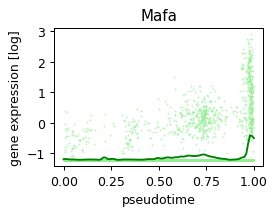

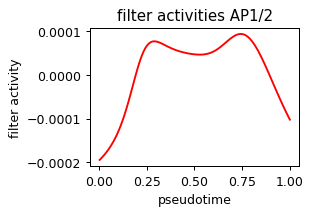

In [307]:
plot_pseudotime('Mafa', 'AP1/2', sigma_gex=.01, sigma_filter=.1,
                save="../../../output/pancreas_mafa_bzip")


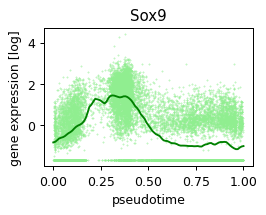

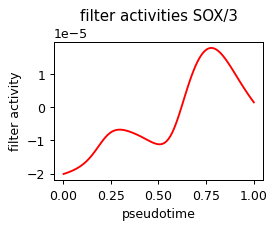

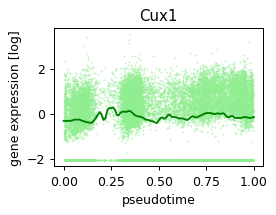

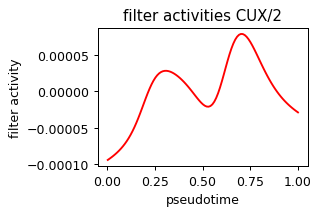

In [308]:
plt.rcParams["font.family"] = 'sans-serif' # None # "Arial"

plot_pseudotime('Sox9', 'SOX/3', sigma_gex=.01, sigma_filter=.1,
                save="../../../output/pancreas_sox9_sox3")

plot_pseudotime('Cux1', 'CUX/2', sigma_gex=.01, sigma_filter=.1,
                save="../../../output/pancreas_cux1_cux2")

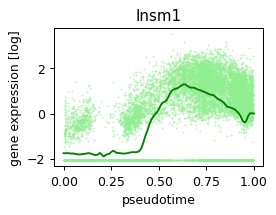

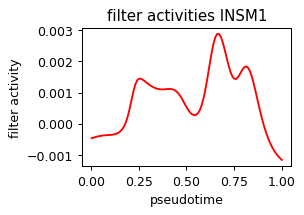

In [309]:
plot_pseudotime('Insm1', 'INSM1', sigma_gex=.01, sigma_filter=.05,
                save="../../../output/pancreas_CCAAT_CEBP_dbpht2")

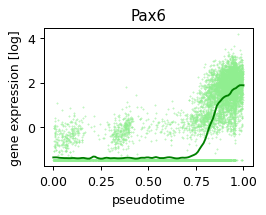

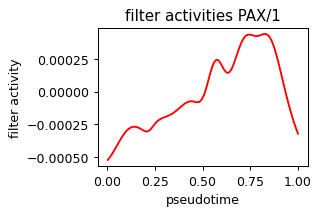

In [310]:
plot_pseudotime('Pax6', 'PAX/1', sigma_gex=.01, sigma_filter=.05,
                save="../../../output/pancreas_CCAAT_CEBP_dbpht2")

In [311]:
res

filter_id  opt_log_dynamic  archetype_id gene_name  matched  spearman  \
0             1            False             2    Arxes1     True  0.007779   
1             1            False             2    Pou6f2     True -0.004708   
2             1            False             2    Arid3b     True  0.000642   
3             1            False             2    Arxes2     True -0.006027   
4             1            False             2      Pdx1     True  0.032841   
...         ...              ...           ...       ...      ...       ...   
3855        280             True           281      Pax2     True  0.013350   
3856        280             True           281      Pax6     True -0.080454   
3857        282             True           283      Pax2     True -0.003662   
3858        283             True           284       Ahr     True  0.023966   
3859        284             True           285      Klf8     True -0.019348   

             p_val   module_name         p_adj                  k  act_change  \
0     4.822502e-01          HD/2  6.830803e-01        HD/2:Arxes1   -0.033147   
1     6.706317e-01          HD/2  8.131867e-01        HD/2:Pou6f2   -0.033147   
2     9.537659e-01          HD/2  9.767940e-01        HD/2:Arid3b   -0.033147   
3     5.862010e-01          HD/2  7.610262e-01        HD/2:Arxes2   -0.033147   
4     3.006220e-03          HD/2  1.455961e-02          HD/2:Pdx1   -0.033147   
...            ...           ...           ...                ...         ...   
3855  2.278529e-01         PAX/1  4.174240e-01         PAX/1:Pax2    0.045139   
3856  3.368429e-13         PAX/1  9.490611e-12         PAX/1:Pax6    0.045139   
3857  7.408379e-01  PAX-halfsite  8.568437e-01  PAX-halfsite:Pax2    0.024079   
3858  3.038693e-02           AHR  9.556552e-02            AHR:Ahr    0.099753   
3859  8.050853e-02      KLF/SP/3  1.976863e-01      KLF/SP/3:Klf8   -0.028565   

      graph_score           z  
0        2.135978    0.814113  
1        2.135978    0.441709  
2        2.135978    0.050152  
3        2.135978    0.583309  
4        2.135978    9.034129  
...           ...         ...  
3855     4.515211    3.944726  
3856     4.515211  103.557179  
3857     4.426383    0.683875  
3858    11.301619   26.535559  
3859     2.733049    4.430474  

[3860 rows x 13 columns]

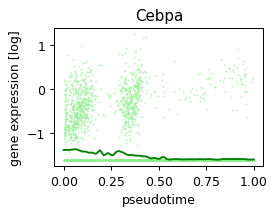

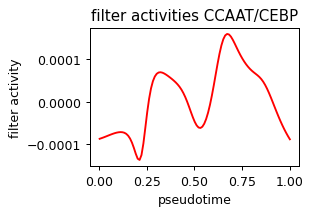

In [312]:
plot_pseudotime('Cebpa', 'CCAAT/CEBP', sigma_gex=.01, sigma_filter=.05,
                save="../../../output/pancreas_CCAAT_CEBP_dbpht2")

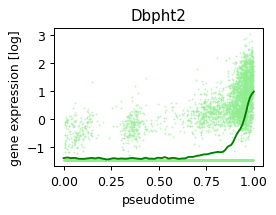

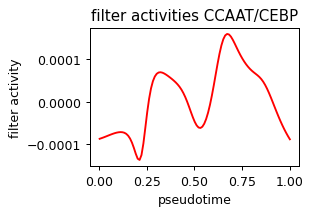

In [313]:
plot_pseudotime('Dbpht2', 'CCAAT/CEBP', sigma_gex=.01, sigma_filter=.05,
                save="../../../output/pancreas_CCAAT_CEBP_dbpht2")

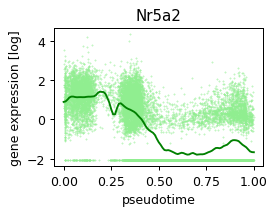

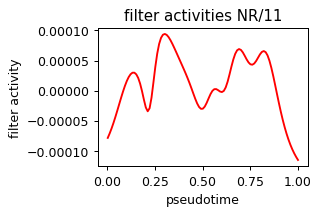

In [314]:
plot_pseudotime('Nr5a2', 'NR/11', sigma_gex=.01, sigma_filter=.05,
                save="../../../output/pancreas_nr5a2_nr11")

In [315]:
def plot_chromatin(filter_name, sigma_chrom,
                   group_key=None, key_sel=None,
                   q_thr=.95, show=True, save=None):
    res_sel = res[res['module_name'].str.contains(filter_name)]['filter_id']
    if res_sel.shape[0] == 0:
        print('not found')
        return None
    filter_id = int(res_sel.values[0])
    print(filter_id)
    scores = binding_per_mode[:,filter_id]
    # filter scores across regions
    # plt.hist(scores)

    if group_key is not None and key_sel is not None:
        ad_sel = ad[ad.obs[group_key] == key_sel]
    else:
        ad_sel = ad
    print('here')

    var_idx = np.argwhere(scores >= np.quantile(scores, q_thr)).flatten()
    var_names = ad_sel.var_names[var_idx]
    print(q_thr, var_names.shape)
    # background with all peaks
    var_names_neg = ad_sel.var_names[~ad.var_names.isin(var_names)]
    
    x = ad_sel.obs['velocity_pseudotime']
    y = ad_sel[:,var_names].X.mean(axis=1).A.flatten()
    # y = np.log(y)
    # y[y == -np.inf] = np.nanmin(y[y != -np.inf])
    y_mean, x_mean = running_mean(y, x, sigma=sigma_chrom)
    plt.scatter(x, y, edgecolors=None, color='lightblue', s=.1)
    plt.plot(x_mean, y_mean, color='blue', label='targets')
    plt.ylabel('')
    plt.title(filter_name + ((', %s' % key_sel) if key_sel is not None else ''))
    plt.ylabel('chromatin accessibility [mean]')
    plt.xlabel('pseudotime')
    # plt.show()

    print(q_thr, var_names_neg.shape)
    x = ad_sel.obs['velocity_pseudotime']
    y = ad_sel[:,var_names_neg].X.mean(axis=1).A.flatten()
    # y = np.log(y)
    # y[y == -np.inf] = np.nanmin(y[y != -np.inf])
    y_mean_avr, x_mean = running_mean(y, x, sigma=sigma_chrom)
    # plt.scatter(x, y, edgecolors=None, color='lightblue', s=.1)
    plt.plot(x_mean, y_mean_avr, color='gray', linestyle='--', label='non-targets')
    plt.ylabel('')
    plt.ylabel('chromatin accessibility [mean]')
    plt.xlabel('pseudotime')
    plt.legend()

    if save is not None:
        plt.savefig(save + '_filter.pdf')
    if not show:
        plt.close()
    else:
        plt.show()
    return (y_mean - y_mean_avr).sum()



265
here
0.86 (7000,)
0.86 (43000,)


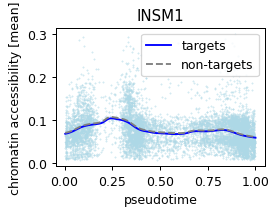

-0.22083609825122197

In [316]:
sigma_chrom = .03
plot_chromatin('INSM1', sigma_chrom, group_key='celltype',
               # key_sel='Beta',
               q_thr=.86, show=True, save=None)

52
here
0.84 (8000,)
0.84 (42000,)


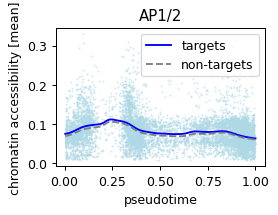

0.5133800347676966

In [317]:
plot_chromatin('AP1/2', sigma_chrom, group_key='celltype',
               # key_sel='Beta',
               q_thr=.84, show=True, save=None)

52
here
0.84 (8000,)
0.84 (42000,)


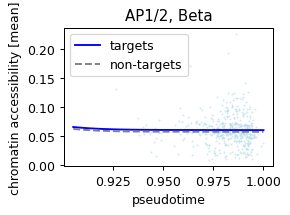

0.31315701141314567

In [318]:
plot_chromatin('AP1/2', sigma_chrom, group_key='celltype', key_sel='Beta', q_thr=.84, show=True, save=None)

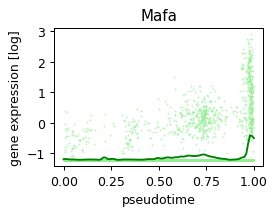

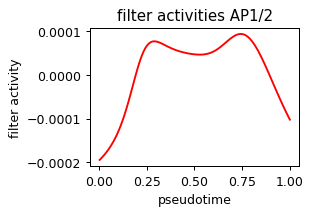

In [319]:
plot_pseudotime('Mafa', 'AP1/2', sigma_gex=.01, sigma_filter=.1,
                save="../../../output/pancreas_mafa_bzip")


In [320]:
plot_chromatin('AP1/2', sigma_chrom, groupby='celltype', q_thr=.95, show=True, save='../../../output/pancreas_ap1_1')

TypeError: plot_chromatin() got an unexpected keyword argument 'groupby'

91
0.83 (1224,)
0.83 (5976,)


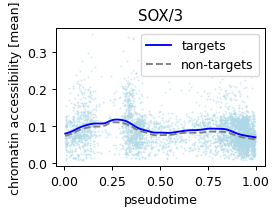

0.6780359101689408

In [ ]:
rcParams['figure.figsize'] = 3, 2
plot_chromatin('SOX/3', sigma_chrom, q_thr=.83, show=True, save='../../../output/pancreas_sox3')

91
0.9 (720,)
0.9 (6480,)


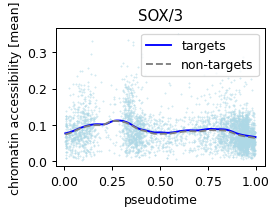

39
0.9 (720,)
0.9 (6480,)


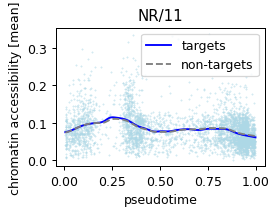

51
0.9 (720,)
0.9 (6480,)


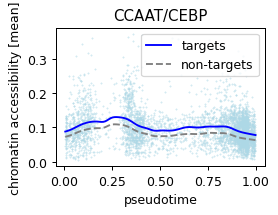

1.824259189866808

In [ ]:
# plt.close()
plot_chromatin('NR/11', sigma_chrom, q_thr=.9, show=True, save='../../../output/pancreas_nr11')
plot_chromatin('CCAAT/CEBP', sigma_chrom, q_thr=.9, show=True, save='../../../output/pancreas_ccaat')

In [ ]:
anno[anno['Name'] == 'CCAAT/CEBP']

Cluster_ID        Name   DBD             Seed_motif  Total_width  \
9          52  CCAAT/CEBP  bZIP  CEBPA_HUMAN.H11MO.0.A           14   

   Consensus_left  Consensus_right  Cluster_size Name_unique  
9               2               11            37  CCAAT/CEBP

247
0.9 (720,)
0.9 (6480,)


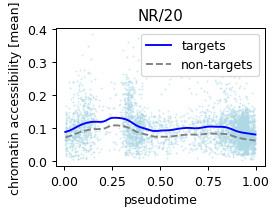

2.0238069901541995

In [ ]:
plot_chromatin('NR/20', sigma_chrom, q_thr=.9, show=True, save='../../../output/pancreas_ccaat')

In [ ]:
module_names = set(res['module_name'])

diff_pseudotime_by_module = []
for name in module_names:
    sigma_chrom = .03
    diff = plot_chromatin(name, sigma_chrom, q_thr=.99, show=False)
    diff_pseudotime_by_module.append([name, diff])
    print(name, diff)
# filter_name = 'SOX/4'
# sigma_chrom = .03
# plot_chromatin(filter_name, sigma_chrom, q_thr=.9)

# filter_name = 'SOX/3'
# sigma_chrom = .03
# plot_chromatin(filter_name, sigma_chrom, q_thr=.84)

# filter_name = 'NR/11'
# sigma_chrom = .02
# plot_chromatin(filter_name, sigma_chrom, q_thr=.95)

# filter_name = 'PAX/1'
# sigma_chrom = .03
# plot_chromatin(filter_name, sigma_chrom, q_thr=.99)
chrom = pd.DataFrame(diff_pseudotime_by_module, columns=['module', 'diff'])

In [ ]:
chrom.sort_values('diff', ascending=False)

module      diff
176       RUNX/1  8.382294
86         THAP1  8.134047
140  Ebox/CATATG  8.051069
30         SIX/1  7.763655
70          NR/8  7.020761
..           ...       ...
149          SRF -4.402584
27           EGR -4.417582
4          ETS/1 -4.855597
20     OCT4+SOX2       NaN
37   DDIT3+CEBPA       NaN

[182 rows x 2 columns]

91
0.7 (2160,)
0.7 (5040,)


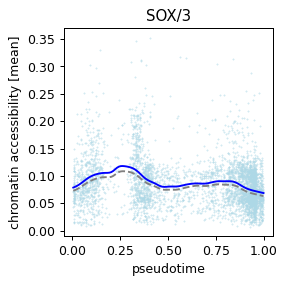

39
0.9 (720,)
0.9 (6480,)


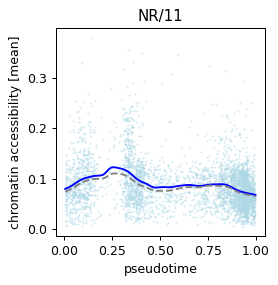

0.5901204762948825

39
0.9 (720,)
0.9 (6480,)


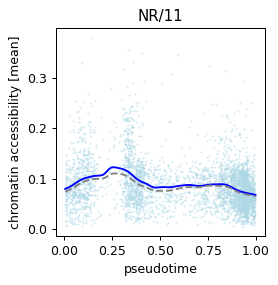

0.5901204762948825

<Axes: >

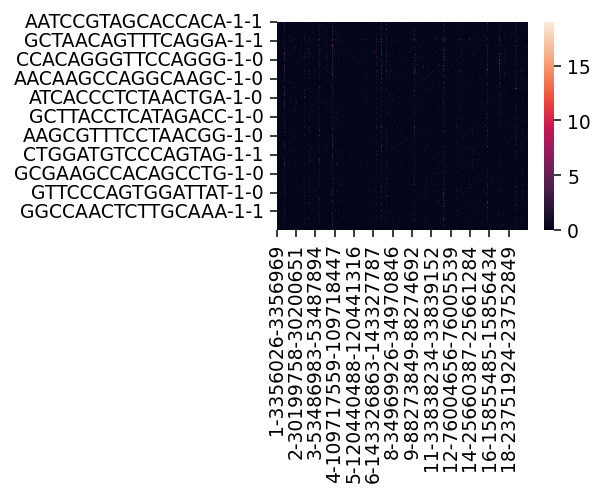

In [ ]:
ad_df = ad.to_df() # .sort_values(ad.obs.velocity_pseudotime)
ad_df['velocity_pseudotime'] = ad.obs.velocity_pseudotime
ad_df = ad_df.sort_values('velocity_pseudotime')
del ad_df['velocity_pseudotime']

ad_df = ad_df[ad_df.sum(axis=1) != 0]

sns.heatmap(ad_df) #  col_cluster=True, row_cluster=False)

In [ ]:
ad

AnnData object with n_obs × n_vars = 4148 × 7200
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'dynamic_score', 'dynamic_score_cluster', 'dynamic_score_z1', 'dynamic_score_z2', 'dynamic_score_abs', 'umap_density_dynamic_score_z1', 'umap_density_dynamic_score_z2', 'velocity_pseudotime'
    var: 'modality', 'acc_score', 'acc_score_rank', 'chr', 'start', 'end', 'summit', 'summit.start', 'summit.end', 'k.summit'
    uns: 'celltype_colors', 'neighbors', 'dynamic_score_z1_colors', 'umap_density_dynamic_score_z1_params', 'umap_density_dynamic_score_z2_params'
    obsm: 'X_pca', 'X_pca_wsnn', 'X_spca_wsnn', 'X_umap', 'X_umap_ATAC', 'X_umap_GEX', 'X_umap_wsnn', 'lsi_full', 'lsi_red', 'umap', 'umap_ATAC', 'umap_GEX',

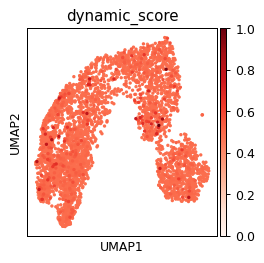

In [ ]:
sc.pl.umap(ad, color='dynamic_score', cmap='Reds')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 6.000e+00, 7.000e+00, 8.000e+00,
        1.700e+01, 2.100e+01, 2.400e+01, 8.500e+01, 1.870e+02, 4.290e+02,
        2.785e+03, 3.010e+02, 1.180e+02, 5.100e+01, 1.900e+01, 1.900e+01,
        1.200e+01, 9.000e+00, 8.000e+00, 3.000e+00, 7.000e+00, 3.000e+00,
        1.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.02      , 0.04      , 0.06      , 0.08      ,
        0.1       , 0.12      , 0.14      , 0.16      , 0.18000001,
        0.2       , 0.22      , 0.23999999, 0.25999999, 0.28      ,
        0.30000001, 0.31999999, 0.34      , 0.36000001, 0.38      ,
        0.40000001, 0.41999999, 0.44      , 0.46000001, 0.47999999,
        0.5       , 0.51999998, 0.54

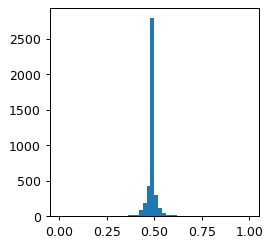

In [ ]:
plt.hist(ad.obs['dynamic_score'], bins=50)

In [ ]:
rna.var_names[rna.var_names.str.contains('Maf')]

Index(['Mafb', 'Mafk', 'Maf', 'Mafg', 'Mafa', 'Maf1', 'Maff'], dtype='object')

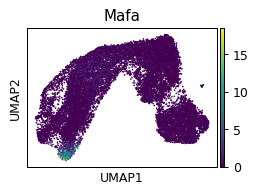

In [ ]:
sc.pl.umap(rna, color='Mafa')

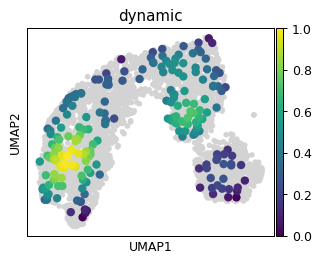

In [ ]:
rcParams['figure.figsize'] = 3, 3
sc.pl.embedding_density(ad, basis='umap', key='umap_density_dynamic_score_z1', group='dynamic', color_map='viridis',
                        save="dynamic_scores_pancreatic_endocrinogenesis.pdf") # basis='umap', groupby='dynamic_score_cluster')
# plt.savefig(

saving figure to file ../../../output/velocity_stream_pancreatic_endocrinogenesis.pdf


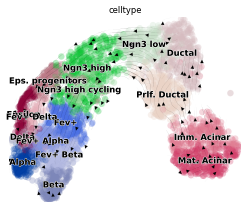

In [ ]:
rcParams['pdf.fonttype'] = 42
rcParams['figure.figsize'] = 5, 4
scv.pl.velocity_embedding_stream(rna_sample,
                                 legend_fontsize=10,
                                 color=cell_type_key,
                                 linewidth=.1,
                                 save="../../../output/velocity_stream_pancreatic_endocrinogenesis")

In [ ]:
# plotting of high_quantile peaks associated with the filter of interest